Lending Club case Study by Vimala Subramanian

In [1]:
# Problem Statement: Identify the consumer attributes and loan attributes that influences the tendency of default. 
# The variables which are strong indicators for defaulting the loan

# Importing Necessary Library

In [2]:
# Lending Club Case Study by Vimala S
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Extra
import warnings
warnings.filterwarnings('ignore')

# Read the loan data file into a dataframe for analysis

In [3]:
df=pd.read_csv(r"C:\Users\s_vim\Downloads\AIML\Lending ClubCase Study_10Apr2024\loan.csv")
pd.set_option('display.max_columns', None)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [4]:
# df.shape 
# len(df)
print("Total number of rows is :" , df.shape[0])
print("Total number of columns is :" , df.shape[1])

Total number of rows is : 39717
Total number of columns is : 111


In [5]:
df.info(verbose=True, show_counts=True) #Display the column details of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

Observations about the dataframe
1. There are lot of columns with all null values, which can be dropped
2. Few columns has very less null values 
3. Some of the fields are of datatype = object which needs to be converted to int or float after data cleaning and imputing
4. Columns with missing values needs to be imputed either by removing or replacing it with a standard value
5. Date fields like payment_d are with dtype as object - this might need to be convered to an data/time field
6. Some columns might not be of meaningful value for further analysis like url which can be dropped off. But let us analyze before dropping off. 


In [6]:
# Use describe functionality to display the details like mean, median std of each column. 
df.describe()
# The output clearly shows some of the columns have zero and can be dropped off - like with count=0

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [7]:
# Identity all the columns which are null and store it in a variable
x=len(df)
z=[]
for col in df.columns :
    if ((df[col].isnull().sum())==x):
#         print(col, " has all null values")
        z.append(col)
print(z)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [8]:
# Data Cleaning - As the these columns doesn't have any value, let us drop them 
df = df.drop(df[z], axis=1)

In [9]:
df.shape # Now the Columns has come down from 111 to 57

(39717, 57)

In [10]:
df.nunique() # Let us take all columns with unique or same value for all rows and drop them as they dont add a meaningful value

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [11]:
# Identity all the columns which has same value and store it in a variable
x1=len(df)
z1=[]
for col in df.columns :
    if ((df[col].nunique()) == 1):
        z1.append(col)
print(z1)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [12]:
# Data Cleaning - As the these columns doesn't have any value, let us drop them 
df = df.drop(df[z1], axis=1)

In [13]:
df.shape

(39717, 48)

In [14]:
df_null_perc = (df.isnull().mean()*100).round(2)   #Get the percentage of missing values for each column with two decimal points
df_null_perc

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.59
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec   

In [15]:
df_null_perc [df_null_perc > 0].sort_values(ascending=False) #Display only the columns with null values in descending order

next_pymnt_d              97.13
mths_since_last_record    92.99
mths_since_last_delinq    64.66
desc                      32.59
emp_title                  6.19
emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
dtype: float64

In [16]:
# Here next_pymnt_d column has 97% of values as null, let us find the unique value
df.next_pymnt_d.unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [17]:
df[['next_pymnt_d']].value_counts() # Get the count of the values 

next_pymnt_d
Jun-16          1125
Jul-16            15
Name: count, dtype: int64

In [18]:
# since this column doesn't provide meaningful value out of 39717 records, let us drop 
df=df.drop("next_pymnt_d",axis=1)

In [19]:
df.shape

(39717, 47)

In [20]:
df[['mths_since_last_record']].value_counts()

mths_since_last_record
0.0                       670
104.0                      61
89.0                       60
113.0                      59
111.0                      57
                         ... 
14.0                        1
19.0                        1
5.0                         1
46.0                        1
129.0                       1
Name: count, Length: 111, dtype: int64

In [21]:
df.mths_since_last_record.unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.])

In [22]:
# Since mths_since_last_record and mths_since_last_delinq columns are expected to have blank values 
# meaning that all rows necessarily need have to have a value, so keeping them and replacing NaN with 0
df["mths_since_last_record"]=df["mths_since_last_record"].fillna(0) 
df["mths_since_last_delinq"]=df["mths_since_last_delinq"].fillna(0) 

In [23]:
# The below columns emp_title, desc doesnt add value for further analysis, so let us drop them 
df= df.drop(df[["emp_title", "desc","url", "zip_code","title"]], axis=1)

In [24]:
df.shape

(39717, 42)

Data cleaning by Rows and Imputing them

Extracting numeric values and Converting the object data types to float or int

In [25]:
df_null_perc = (df.isnull().mean()*100).round(2) 
df_null_perc [df_null_perc >0].sort_values(ascending=False) #Display only the columns with null values in descending order

emp_length              2.71
pub_rec_bankruptcies    1.75
last_pymnt_d            0.18
revol_util              0.13
last_credit_pull_d      0.01
dtype: float64

In [26]:
# Let us analyze the emp_length 
df.emp_length.unique()
# This has to be cleaned, replace Nan with 0 and convert the dtype object to int or float

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:
df[['emp_length']].value_counts()

emp_length
10+ years     8879
< 1 year      4583
2 years       4388
3 years       4095
4 years       3436
5 years       3282
1 year        3240
6 years       2229
7 years       1773
8 years       1479
9 years       1258
Name: count, dtype: int64

In [28]:
df[df["emp_length"].isnull()] # Get the rows which has emp_length

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
168    1067644    1302032       2500         2500       2500.00000   
323    1058717    1290516      18000        18000      18000.00000   
394    1064582    1298394       4000         4000       4000.00000   
422    1064366    1298164       1000         1000       1000.00000   
439    1063912    1296491       8250         8250       8250.00000   
...        ...        ...        ...          ...              ...   
32591   480410     610728      10000        10000       9975.00000   
32608   480216     610335       3700         3700       3700.00000   
32621   479954     609955      10000        10000       9731.17513   
32631   479836     609803       6000         6000       6000.00000   
32665   479468     609246      25000        25000      23912.90328   

             term int_rate  installment grade sub_grade emp_length  \
168     36 months    7.51%        77.78     A        A3        NaN   
323     60 months   17.58%       452.98     D        D4        NaN   
394     36 months   11.71%       132.31     B        B3        NaN   
422     36 months   14.65%        34.50     C        C3        NaN   
439     36 months    7.51%       256.67     A        A3        NaN   
...           ...      ...          ...   ...       ...        ...   
32591   36 months   14.22%       342.85     C        C5        NaN   
32608   36 months   14.22%       126.86     C        C5        NaN   
32621   36 months   14.22%       342.85     C        C5        NaN   
32631   36 months   12.73%       201.40     C        C1        NaN   
32665   36 months   10.25%       809.62     B        B2        NaN   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
168              OWN     12000.0     Source Verified  Dec-11  Charged Off   
323         MORTGAGE     60000.0            Verified  Dec-11   Fully Paid   
394             RENT     24000.0     Source Verified  Dec-11   Fully Paid   
422             RENT     18408.0        Not Verified  Dec-11  Charged Off   
439         MORTGAGE     31500.0            Verified  Dec-11   Fully Paid   
...              ...         ...                 ...     ...          ...   
32591           RENT     45000.0        Not Verified  Jan-10   Fully Paid   
32608           RENT     17496.8        Not Verified  Jan-10   Fully Paid   
32621       MORTGAGE     36000.0        Not Verified  Jan-10  Charged Off   
32631       MORTGAGE     60000.0        Not Verified  Jan-10   Fully Paid   
32665       MORTGAGE    134000.0        Not Verified  Feb-10   Fully Paid   

                  purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
168    debt_consolidation         CA  16.30            0           Aug-94   
323    debt_consolidation         AL  21.96            0           Mar-03   
394      home_improvement         FL   7.50            1           Feb-05   
422        major_purchase         NJ   6.00            0           Apr-93   
439    debt_consolidation         MD  17.87            0           Dec-81   
...                   ...        ...    ...          ...              ...   
32591      small_business         PA   4.51            0           Sep-00   
32608               other         TX   3.36            0           Aug-06   
32621               other         MA   3.83            2           Apr-00   
32631              moving         MN  12.80            0           Oct-01   
32665      small_business         OH   0.13            0           Feb-88   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
168                 2                     0.0                     0.0   
323                 1                    75.0                     0.0   
394                 0                    16.0                     0.0   
422                 2                     0.0                   114.0   
439                 4                     0.0                     0.0   
...               ...                     

In [29]:
df = df[df["emp_length"].notna()] #overwrite the dataframe only with valid values for emp_length column by removing Nan or blank

In [30]:
df.shape

(38642, 42)

In [31]:
df['emp_length']=df['emp_length'].str.extract('(\d+)').astype(int)

In [32]:
df['emp_length'].dtype

dtype('int32')

In [33]:
df[['emp_length']].value_counts()

emp_length
10            8879
1             7823
2             4388
3             4095
4             3436
5             3282
6             2229
7             1773
8             1479
9             1258
Name: count, dtype: int64

In [34]:
df[['pub_rec_bankruptcies']].value_counts()

pub_rec_bankruptcies
0.0                     36375
1.0                      1563
2.0                         7
Name: count, dtype: int64

In [35]:
df[df["pub_rec_bankruptcies"].isnull()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
35006  69001     265533      15000        15000     14875.000000   36 months   
35058  59006     154254       3000         3000      2988.236621   36 months   
35362  65426     232106       4000         4000      3892.258856   36 months   
38443  68926     264924       2300         2300       589.605658   36 months   
38717  69251     267771       6000         6000       500.000000   36 months   
...      ...        ...        ...          ...              ...         ...   
39712  92187      92174       2500         2500      1075.000000   36 months   
39713  90665      90607       8500         8500       875.000000   36 months   
39714  90395      90390       5000         5000      1325.000000   36 months   
39715  90376      89243       5000         5000       650.000000   36 months   
39716  87023      86999       7500         7500       800.000000   36 months   

      int_rate  installment grade sub_grade  emp_length home_ownership  \
35006    8.94%       476.58     A        A5           1       MORTGAGE   
35058   14.26%       102.92     C        C5           3       MORTGAGE   
35362   11.14%       131.22     B        B1           1       MORTGAGE   
38443   13.17%        77.69     D        D2          10           RENT   
38717    8.00%       188.02     A        A3           1       MORTGAGE   
...        ...          ...   ...       ...         ...            ...   
39712    8.07%        78.42     A        A4           4       MORTGAGE   
39713   10.28%       275.38     C        C1           3           RENT   
39714    8.07%       156.84     A        A4           1       MORTGAGE   
39715    7.43%       155.38     A        A2           1       MORTGAGE   
39716   13.75%       255.43     E        E2           1            OWN   

       annual_inc verification_status issue_d  loan_status  \
35006    110000.0        Not Verified  Sep-09   Fully Paid   
35058     80800.0        Not Verified  Sep-09   Fully Paid   
35362     60000.0        Not Verified  Aug-09  Charged Off   
38443     37152.0            Verified  Aug-08   Fully Paid   
38717     75000.0        Not Verified  May-08   Fully Paid   
...           ...                 ...     ...          ...   
39712    110000.0        Not Verified  Jul-07   Fully Paid   
39713     18000.0        Not Verified  Jul-07   Fully Paid   
39714    100000.0        Not Verified  Jul-07   Fully Paid   
39715    200000.0        Not Verified  Jul-07   Fully Paid   
39716     22000.0        Not Verified  Jun-07   Fully Paid   

                  purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
35006         credit_card         NY   7.07            0           Nov-91   
35058         credit_card         TX  14.97            1           Jul-98   
35362                 car         MI  11.08            0           Aug-95   
38443              moving         NJ   2.26            0           Dec-97   
38717               other         OH  16.08            0           Dec-94   
...                   ...        ...    ...          ...              ...   
39712    home_improvement         CO  11.33            0           Nov-90   
39713         credit_card         NC   6.40            1           Dec-86   
39714  debt_consolidation         MA   2.30            0           Oct-98   
39715               other         MD   3.72            0           Nov-88   
39716  debt_consolidation         MA  14.29            1           Oct-03   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
35006               1                     0.0                     0.0   
35058               0                    13.0                     0.0   
35362               0                     0.0                     0.0   
38443               0                    46.0                     0.0   
38717               1                     0.0                     0.0   
...               ...                     ...       

In [36]:
# Since majority of them have value as 0 imputing 697 rows containing NaN will 0
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].fillna(0) 
# df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].fillna(df['pub_rec_bankruptcies'].mode()[0]) 


In [37]:
df[['pub_rec_bankruptcies']].value_counts() # the rows wil 0.0 is increased to 37072

pub_rec_bankruptcies
0.0                     37072
1.0                      1563
2.0                         7
Name: count, dtype: int64

In [38]:
df_null_perc = (df.isnull().mean()*100).round(2) 
df_null_perc [df_null_perc >0].sort_values(ascending=False) #Display only the columns with null values in descending order

last_pymnt_d          0.17
revol_util            0.12
last_credit_pull_d    0.01
dtype: float64

In [39]:
# Since the above columns have less rows with null values let us drop those rows

In [40]:
df.shape

(38642, 42)

In [41]:
df.isnull().any(axis=1).sum()  #shows how many number of rows are having any null values

111

In [42]:
df.dropna(inplace=True) #drop all the rows having null values

In [43]:
df.shape

(38531, 42)

dtype conversion of objects to float or int 

In [44]:
df.select_dtypes(include=object).info() #display information of only the columns having datatype as object

<class 'pandas.core.frame.DataFrame'>
Index: 38531 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 38531 non-null  object
 1   int_rate             38531 non-null  object
 2   grade                38531 non-null  object
 3   sub_grade            38531 non-null  object
 4   home_ownership       38531 non-null  object
 5   verification_status  38531 non-null  object
 6   issue_d              38531 non-null  object
 7   loan_status          38531 non-null  object
 8   purpose              38531 non-null  object
 9   addr_state           38531 non-null  object
 10  earliest_cr_line     38531 non-null  object
 11  revol_util           38531 non-null  object
 12  last_pymnt_d         38531 non-null  object
 13  last_credit_pull_d   38531 non-null  object
dtypes: object(14)
memory usage: 4.4+ MB


In [45]:
# Data Standardization for the column term by removing the value months
df['term'] = df.term.str.replace('months','').astype(int)
df[['term']].value_counts()

term
36      28194
60      10337
Name: count, dtype: int64

In [46]:
df['term'].info()

<class 'pandas.core.series.Series'>
Index: 38531 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
38531 non-null  int32
dtypes: int32(1)
memory usage: 451.5 KB


In [47]:
# Data Standardization for the column int_rate by removing the % and change dtype=float
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

In [48]:
# Convert the Date columns:issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [49]:
df.issue_d.dtype

dtype('<M8[ns]')

In [50]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   

   int_rate  installment grade sub_grade  emp_length home_ownership  \
0    0.1065       162.87     B        B2          10           RENT   
1    0.1527        59.83     C        C4           1           RENT   
2    0.1596        84.33     C        C5          10           RENT   
3    0.1349       339.31     C        C1          10           RENT   
4    0.1269        67.79     B        B5           1           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0     24000.0            Verified 2011-12-01   Fully Paid     credit_card   
1     30000.0     Source Verified 2011-12-01  Charged Off             car   
2     12252.0        Not Verified 2011-12-01   Fully Paid  small_business   
3     49200.0     Source Verified 2011-12-01   Fully Paid           other   
4     80000.0     Source Verified 2011-12-01      Current           other   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         AZ  27.65            0       1985-01-01               1   
1         GA   1.00            0       1999-04-01               5   
2         IL   8.72            0       2001-11-01               2   
3         CA  20.00            0       1996-02-01               1   
4         OR  17.94            0       1996-01-01               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     0.0                     0.0         3        0   
1                     0.0                     0.0         3        0   
2                     0.0                     0.0         2        0   
3                    35.0                     0.0        10        0   
4                    38.0                     0.0        15        0   

   revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0      13648       0.837          9       0.00           0.00   5863.155187   
1       1687       0.094          4       0.00           0.00   1008.710000   
2       2956       0.985         10       0.00           0.00   3005.666844   
3       5598       0.210         37       0.00           0.00  12231.890000   
4      27783       0.539         38     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   
2        0.00                     0.00   2014-06-01           649.91   
3        0.00                     0.00   2015-01-01           357.48   
4        0.00                     0.00   2016-05-01            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  
0         2016-05-01                   0.0  
1         2013-09-01                   0.0  
2         2016-05-01                   0.0  
3         2016-04-01                   0.0  
4         2016-05-01                   0.0

In [51]:
df.shape

(38531, 42)

Categorize the columns 

In [52]:
# writing back the df to an csv file
df.to_csv("C:\\Users\\s_vim\\Downloads\\AIML\\Lending ClubCase Study_10Apr2024\\loan2.csv", mode="a")

In [53]:
df.nunique()

id                         38531
member_id                  38531
loan_amnt                    879
funded_amnt                 1037
funded_amnt_inv             8087
term                           2
int_rate                     371
installment                15113
grade                          7
sub_grade                     35
emp_length                    10
home_ownership                 5
annual_inc                  5091
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
addr_state                    50
dti                         2863
delinq_2yrs                   11
earliest_cr_line             515
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21421
revol_util                  1087
total_acc                     82
out_prncp                   1096
out_prncp_

In [54]:
# creating new column 'month' and 'year' from 'issue_d' column for detailed analysis
df["issue_d_year"] = df.issue_d.dt.year.astype('int') 
df['issue_d_month'] = df.issue_d.dt.strftime('%b')

In [55]:
df["issue_d_year"].dtype

dtype('int32')

In [56]:
df["issue_d_month"].dtype

dtype('O')

In [57]:
df.info(verbose=True, show_counts=True) #Display the column details of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 38531 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38531 non-null  int64         
 1   member_id                38531 non-null  int64         
 2   loan_amnt                38531 non-null  int64         
 3   funded_amnt              38531 non-null  int64         
 4   funded_amnt_inv          38531 non-null  float64       
 5   term                     38531 non-null  int32         
 6   int_rate                 38531 non-null  float64       
 7   installment              38531 non-null  float64       
 8   grade                    38531 non-null  object        
 9   sub_grade                38531 non-null  object        
 10  emp_length               38531 non-null  int32         
 11  home_ownership           38531 non-null  object        
 12  annual_inc               38531 non-nu

In [58]:
# Let us identify the Key Numerical col and Cateogrical cols
num_cols = ['loan_amnt','funded_amnt','int_rate','emp_length', 'annual_inc','total_pymnt','dti', ]
cat_cols_unordered = ['term','grade','sub_grade', 'home_ownership','loan_status','purpose','pub_rec_bankruptcies',
                      'total_acc', 'pub_rec','open_acc','delinq_2yrs','addr_state']
cat_cols_ordered = ['verification_status','issue_d_year','issue_d_month']
# By looking at the description of the column names, the following columns might not be useful for our analysis related to identify defaulters
other_cols = ["id","member_id",'funded_amnt_inv','installment','earliest_cr_line','last_credit_pull_d','last_pymnt_amnt',
          'last_pymnt_d','collection_recovery_fee', 'recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp',
          'total_pymnt_inv','inq_last_6mths', 'revol_util','revol_bal','mths_since_last_delinq','mths_since_last_record','earliest_cr_line',
          'out_prncp','out_prncp_inv','total_pymnt_inv']


In [59]:
# let us drop not needed columns
df= df.drop(df[other_cols], axis=1)

In [60]:
df.shape

(38531, 23)

In [61]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38531 entries, 0 to 39716
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_amnt    38531 non-null  int64  
 1   funded_amnt  38531 non-null  int64  
 2   int_rate     38531 non-null  float64
 3   emp_length   38531 non-null  int32  
 4   annual_inc   38531 non-null  float64
 5   total_pymnt  38531 non-null  float64
 6   dti          38531 non-null  float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 2.2 MB


In [62]:
df[cat_cols_unordered].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38531 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   term                  38531 non-null  int32  
 1   grade                 38531 non-null  object 
 2   sub_grade             38531 non-null  object 
 3   home_ownership        38531 non-null  object 
 4   loan_status           38531 non-null  object 
 5   purpose               38531 non-null  object 
 6   pub_rec_bankruptcies  38531 non-null  float64
 7   total_acc             38531 non-null  int64  
 8   pub_rec               38531 non-null  int64  
 9   open_acc              38531 non-null  int64  
 10  delinq_2yrs           38531 non-null  int64  
 11  addr_state            38531 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 3.7+ MB


In [63]:
df[cat_cols_ordered].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38531 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   verification_status  38531 non-null  object
 1   issue_d_year         38531 non-null  int32 
 2   issue_d_month        38531 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.0+ MB


In [64]:
df.head()

loan_amnt  funded_amnt  term  int_rate grade sub_grade  emp_length  \
0       5000         5000    36    0.1065     B        B2          10   
1       2500         2500    60    0.1527     C        C4           1   
2       2400         2400    36    0.1596     C        C5          10   
3      10000        10000    36    0.1349     C        C1          10   
4       3000         3000    60    0.1269     B        B5           1   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
4           RENT     80000.0     Source Verified 2011-12-01      Current   

          purpose addr_state    dti  delinq_2yrs  open_acc  pub_rec  \
0     credit_card         AZ  27.65            0         3        0   
1             car         GA   1.00            0         3        0   
2  small_business         IL   8.72            0         2        0   
3           other         CA  20.00            0        10        0   
4           other         OR  17.94            0        15        0   

   total_acc   total_pymnt  pub_rec_bankruptcies  issue_d_year issue_d_month  
0          9   5863.155187                   0.0          2011           Dec  
1          4   1008.710000                   0.0          2011           Dec  
2         10   3005.666844                   0.0          2011           Dec  
3         37  12231.890000                   0.0          2011           Dec  
4         38   3513.330000                   0.0          2011           Dec

In [65]:
# Checking if there are any rows with Nan values. The results in none 
df[df.iloc[:,:].isnull().all(1)]

Empty DataFrame
Columns: [loan_amnt, funded_amnt, term, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, delinq_2yrs, open_acc, pub_rec, total_acc, total_pymnt, pub_rec_bankruptcies, issue_d_year, issue_d_month]
Index: []

Univariate Analysis - Checking the impact of numerical columns

Boxplot of  loan_amnt


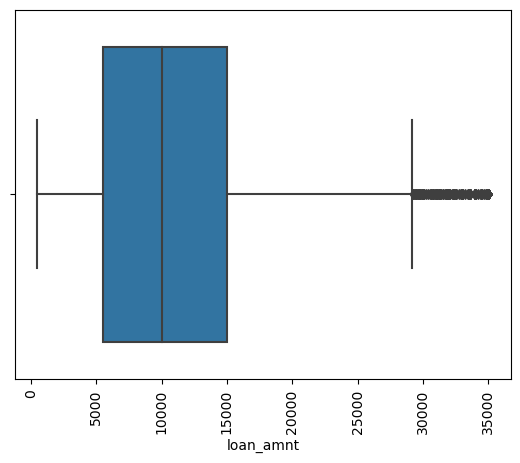

Boxplot of  funded_amnt


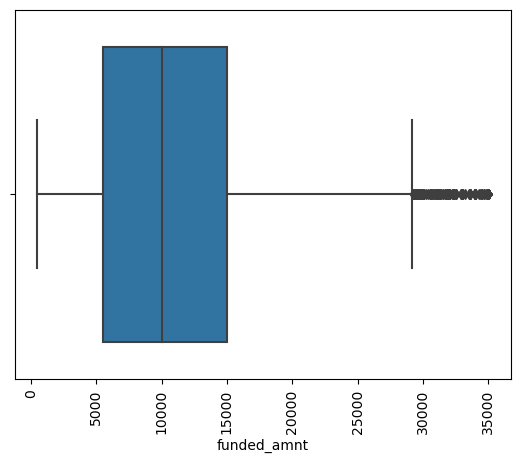

Boxplot of  int_rate


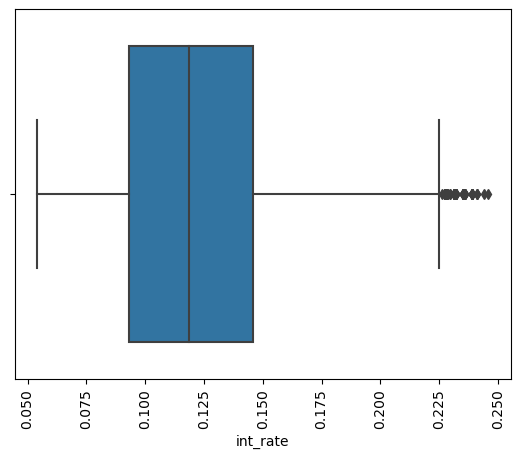

Boxplot of  emp_length


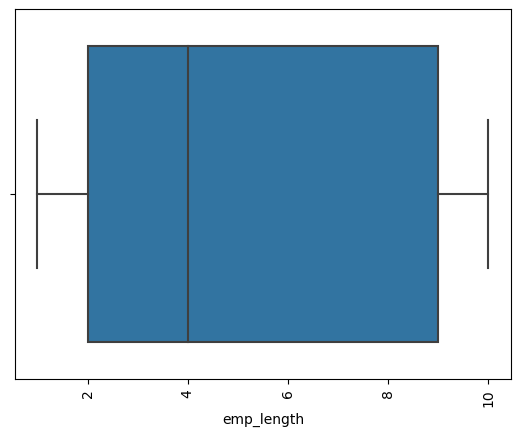

Boxplot of  annual_inc


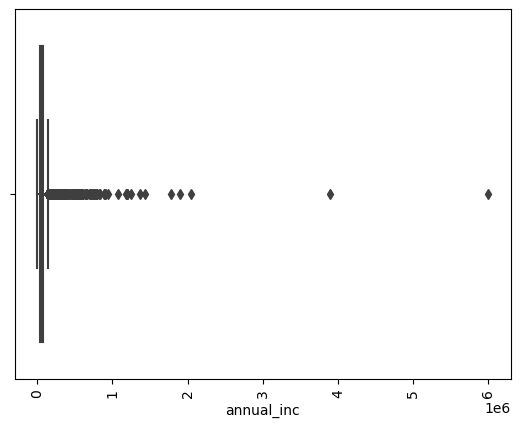

Boxplot of  total_pymnt


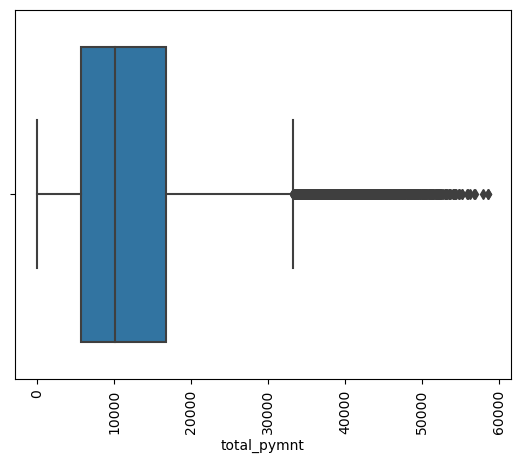

Boxplot of  dti


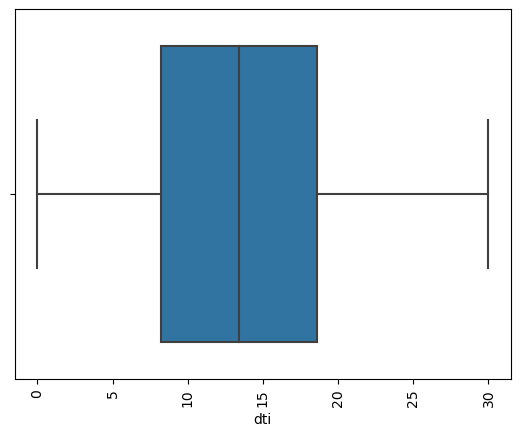

In [66]:
for i in num_cols:
    sns.boxplot(x=df[i])
    print("Boxplot of ", i)
    plt.xticks(rotation=90)
    plt.show()

Observations
1. Box Plot for loan_amnt shows, outliers >30000 which means the rows greater than 30000 can be dropped of. 
2. Box Plot for funded_amnt shows, same as loan_amnt which means the column can be dropped of. 
3. Box Plot for int_rate shows, outliers > 22.5% interested rate which means the rows greater than can be dropped of. 
4. Box Plot for emp_length shows, the median is 4. 
5. Box Plot for total_pymnt shows, outliers >30000 which means if the rows of  loan_amnt >30000 is dropped of, this also will go away


In [67]:
len(df[df["loan_amnt"] > 30000]) # Get the count of records which lie above 30000 as loan amount

812

In [68]:
#Let us drop these rows with loan amount >30000 
df = df[df["loan_amnt"] <= 30000]

In [69]:
len(df[df["int_rate"] > .225]) # Get the count of records which lie above interest rate 22.5. Since no records removing them.

59

In [70]:
#Let us drop these rows with interest rate > .225
df = df[df["int_rate"] <= .225]

In [71]:
df['annual_inc'].describe()

count    3.766000e+04
mean     6.839578e+04
std      6.347680e+04
min      4.000000e+03
25%      4.100000e+04
50%      5.880000e+04
75%      8.108400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [72]:
#  Box Plot for funded_amnt shows, same as loan_amnt which means the column can be dropped of
# Also total_pymnt column also doesnt give much value so dropping off. 
df= df.drop(['funded_amnt','total_pymnt'], axis=1)

In [73]:
updated_num_cols = ['loan_amnt','int_rate','emp_length', 'annual_inc','dti']

In [74]:
# writing back the df to an csv file
df.to_csv("C:\\Users\\s_vim\\Downloads\\AIML\\Lending ClubCase Study_10Apr2024\\loan3.csv", mode="a")

UniVariate Analysis for Numerical Columns 

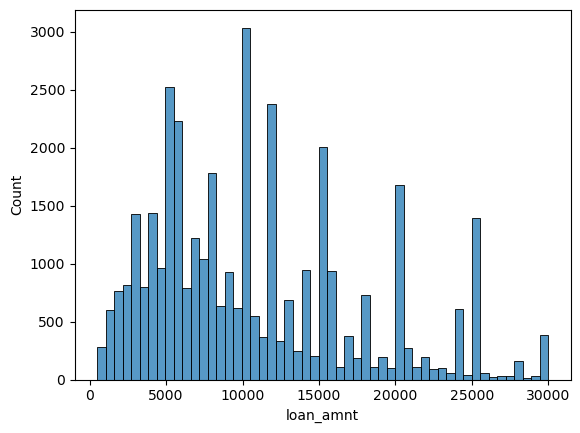

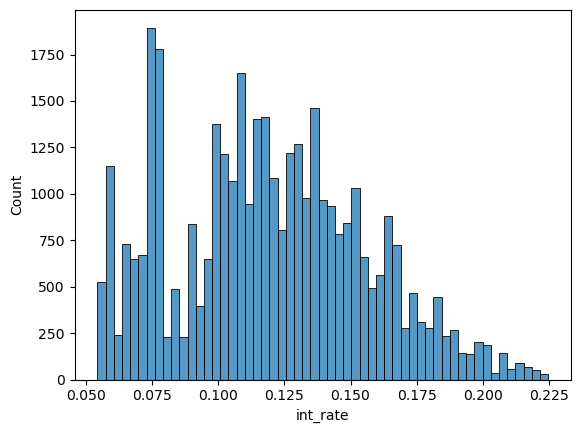

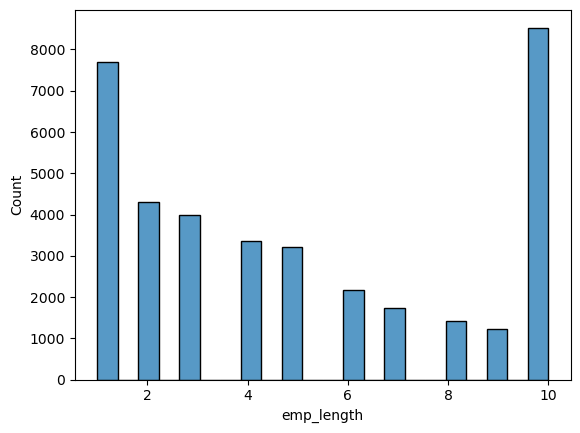

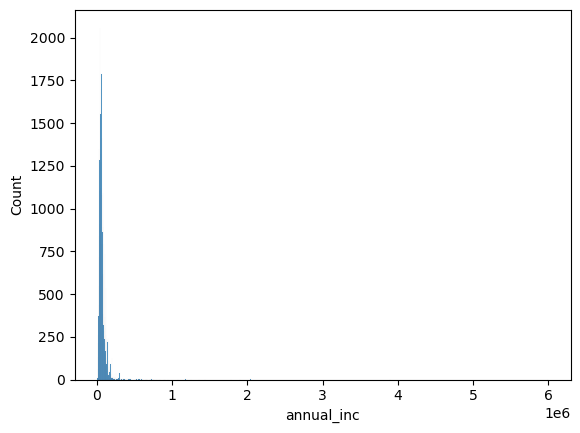

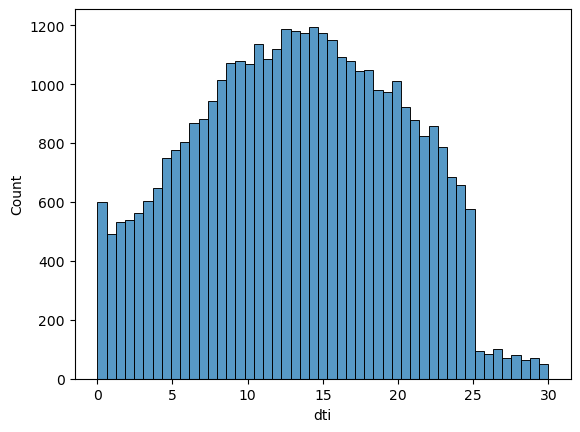

In [75]:

for i in updated_num_cols:

    sns.histplot(x=df[i])
    plt.show()

UniVariate Analysis for Categorical Columns 

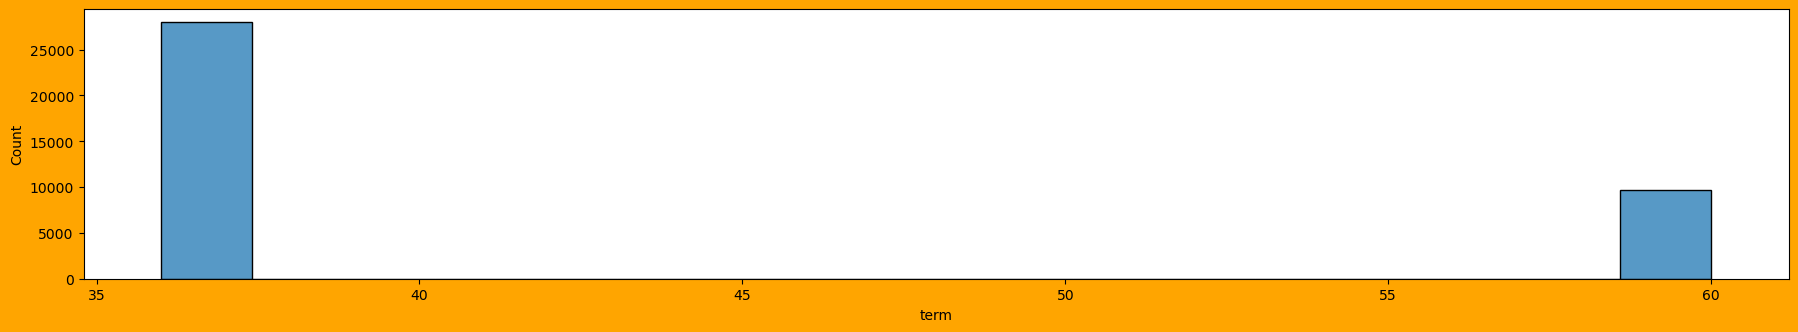

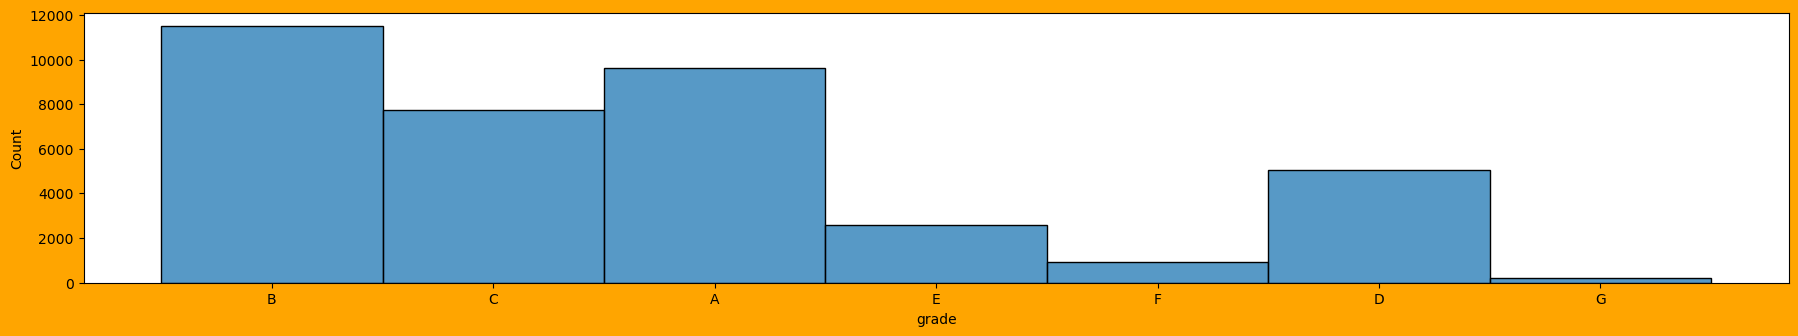

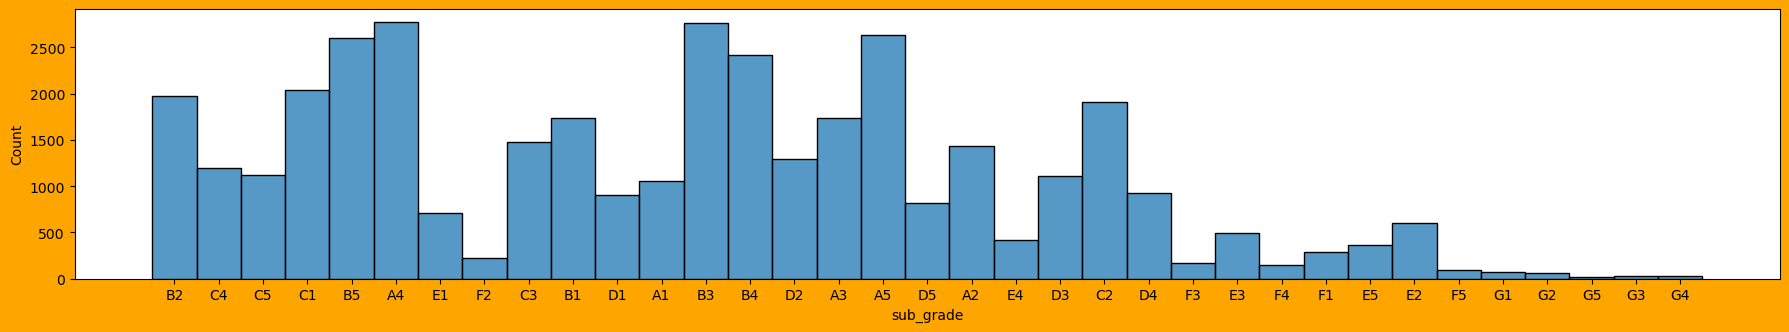

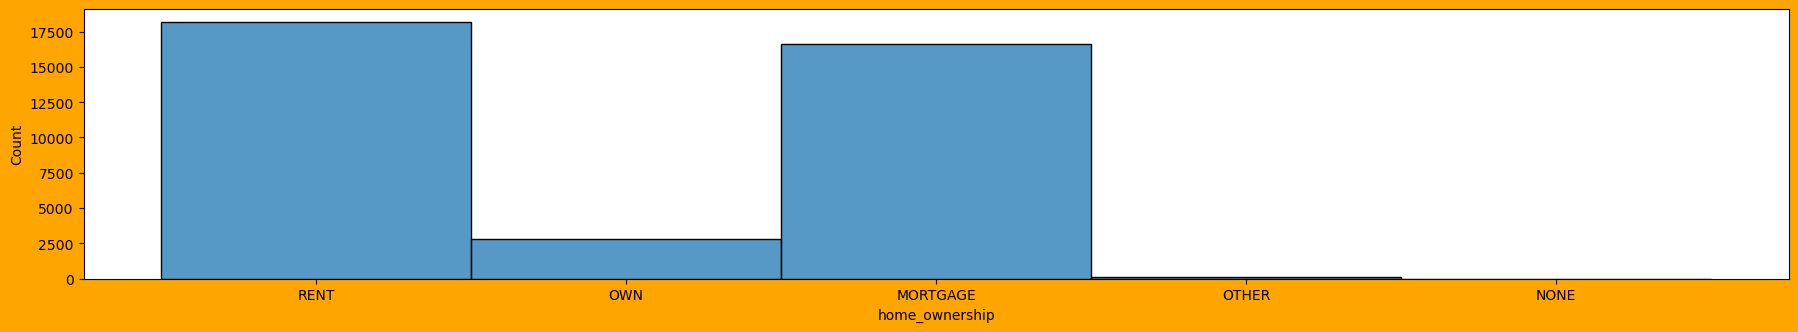

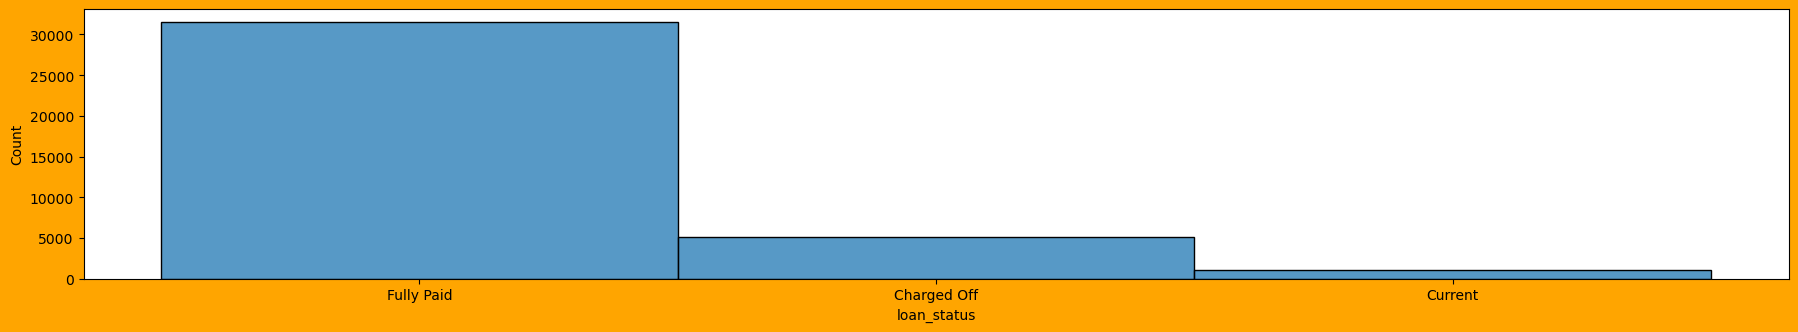

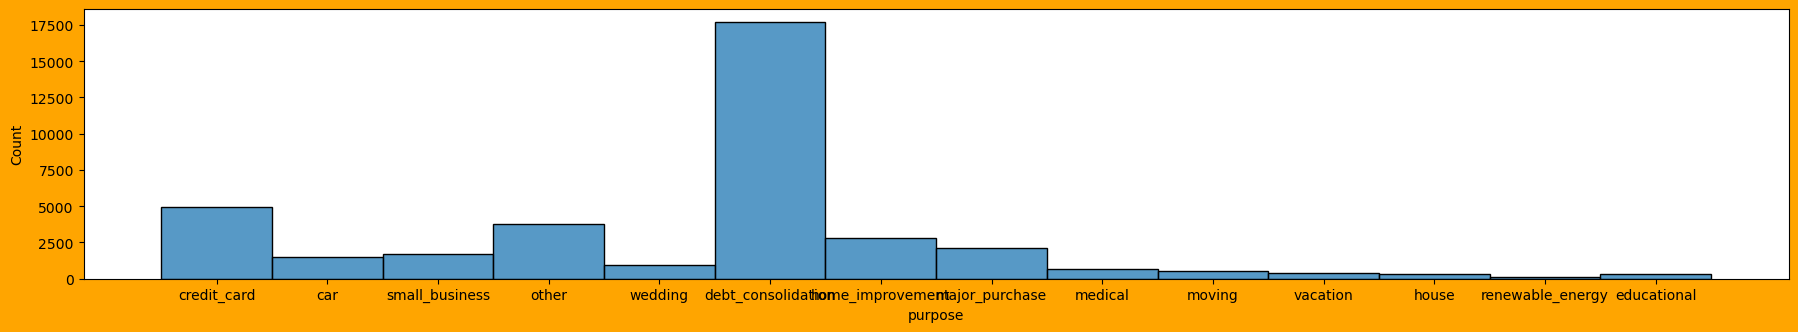

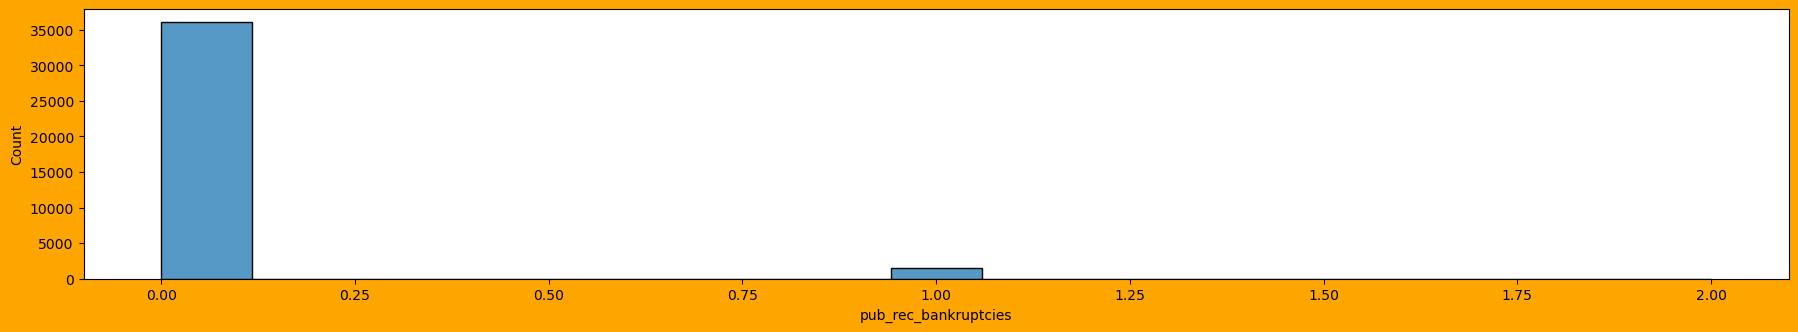

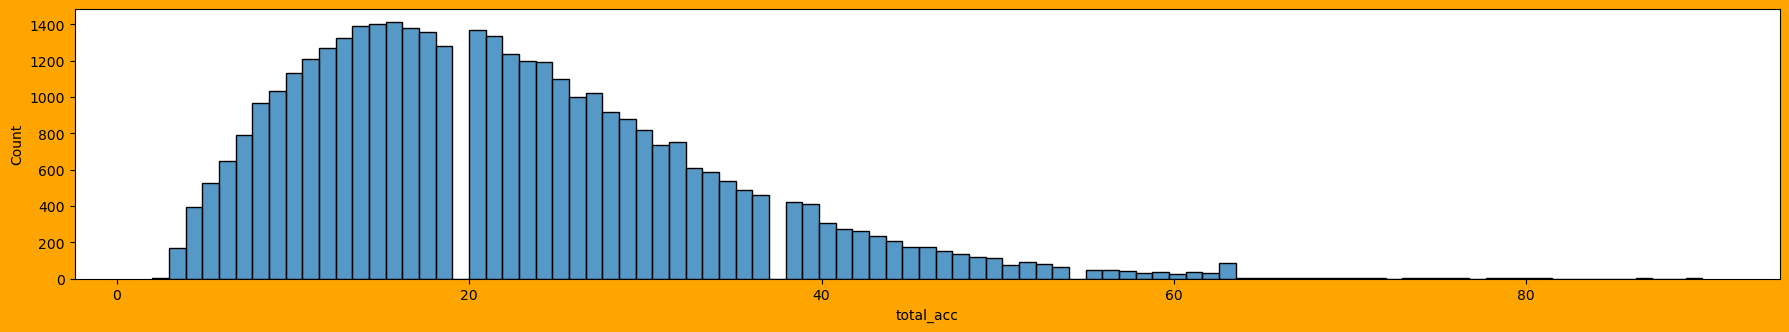

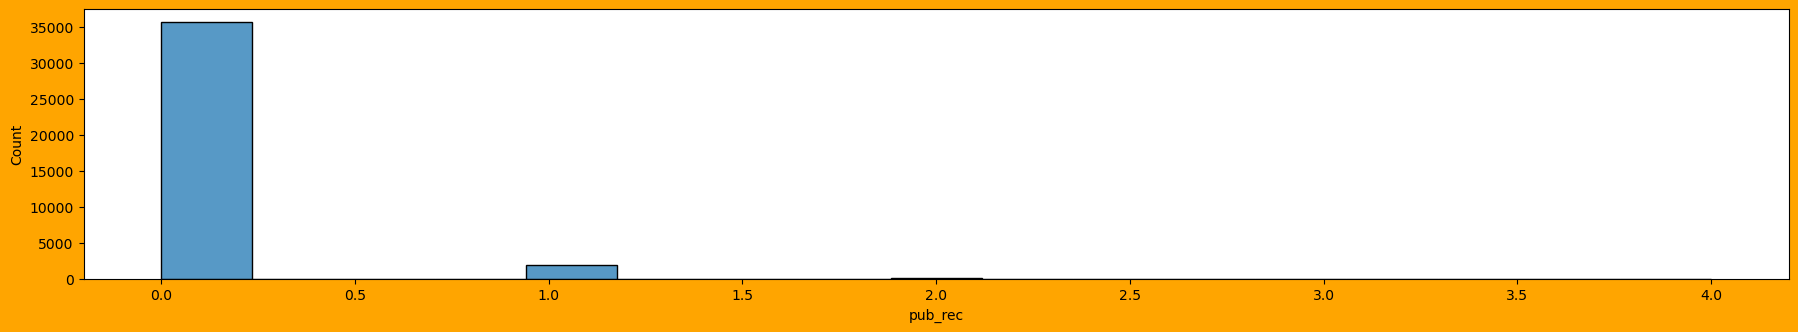

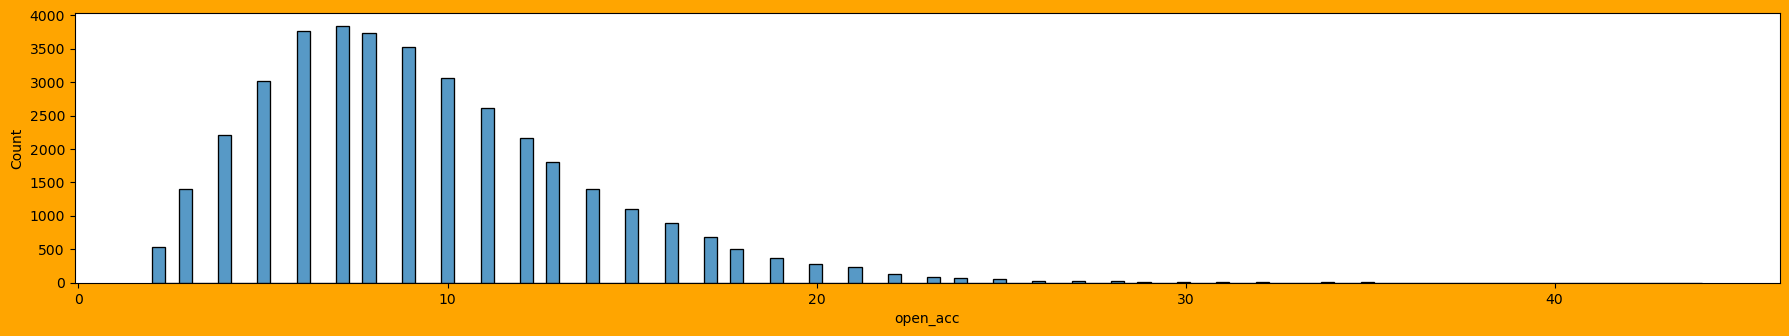

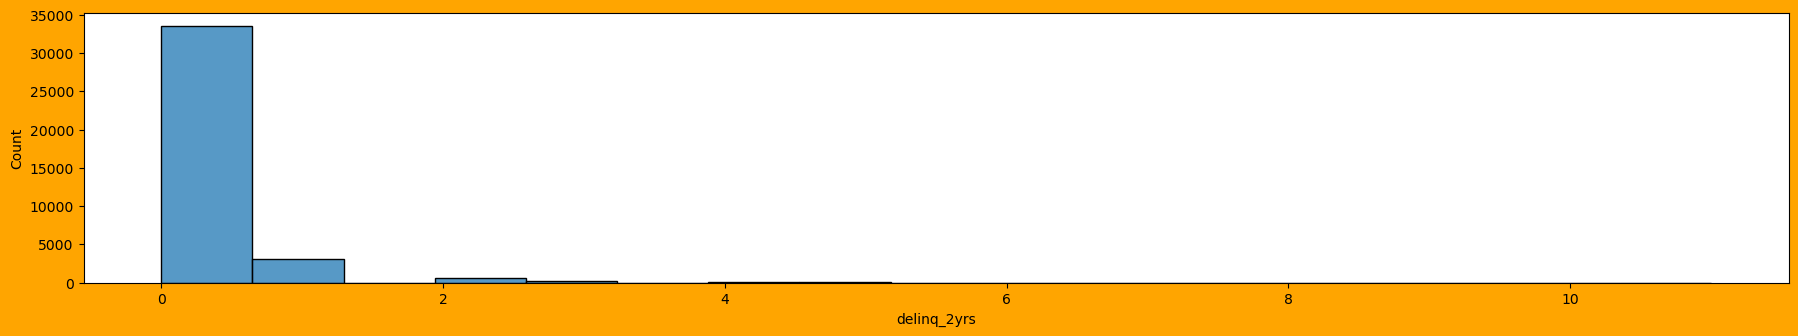

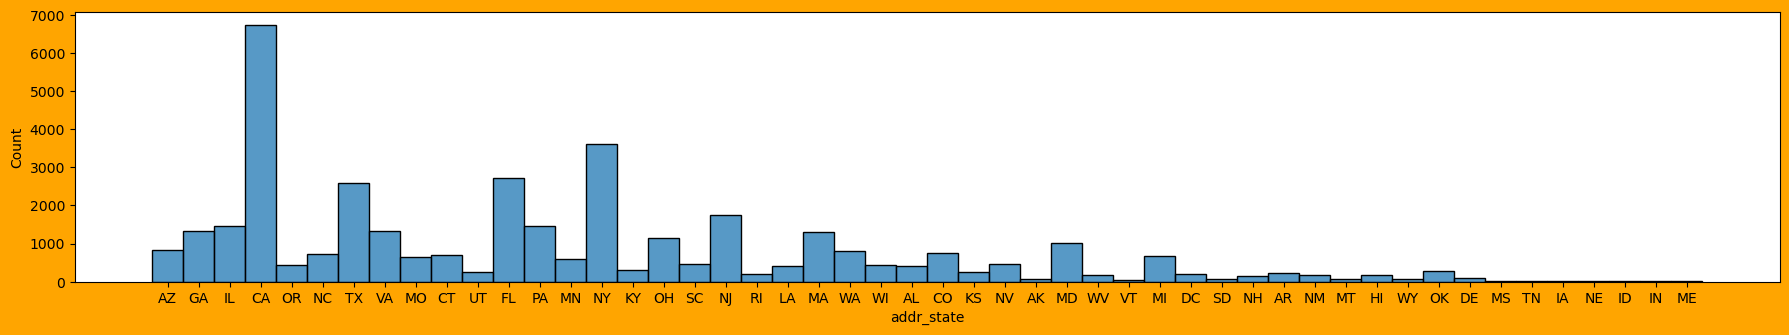

In [76]:
for i in cat_cols_unordered:
    plt.figure(figsize=(22,3.5),facecolor='orange', edgecolor='red')
    sns.histplot(x=df[i])
    plt.show()

Inference
1. For higher loan amount the term is 36 months and loan amount <= 10000 the term is 60 months which is odd 
2. Employees with Grade B & A are highest loan seekers and there are more outliers in Grade A 
3. People with Subgrades A4, B3 ,B4,  B5 have taken loans 
4. The main purpose is for paying Rent or Mortgage
5. The major purpose for loan request is debt_consolidation - which means this loan is taken to repay another loan
6. More number of people from CA has taken followed by NY. This is a key parameter to analyze and who has not repayed 
7. Employees with more experience have taken long term loans

Inference
1. There is around 50% of cases where income is not Verified, This is something the bank has to consider
2. For the Year 2011 the number of loans given is high and is increasing from 2007
3. Loans given during Dec month is high

Bi-Variate Analysis for Numerical Columns 

Scatter plot of : loan_amnt Vs loan_amnt


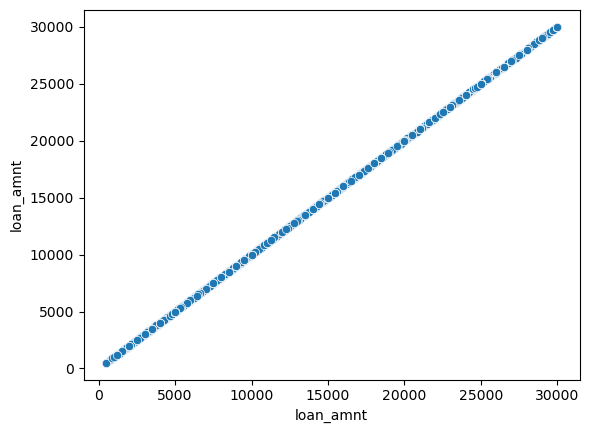

Scatter plot of : loan_amnt Vs int_rate


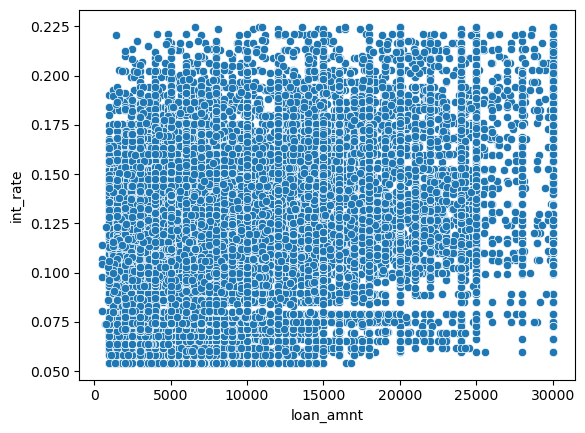

Scatter plot of : loan_amnt Vs emp_length


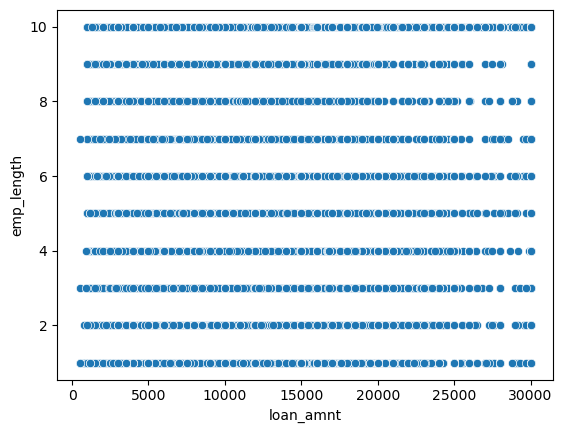

Scatter plot of : loan_amnt Vs annual_inc


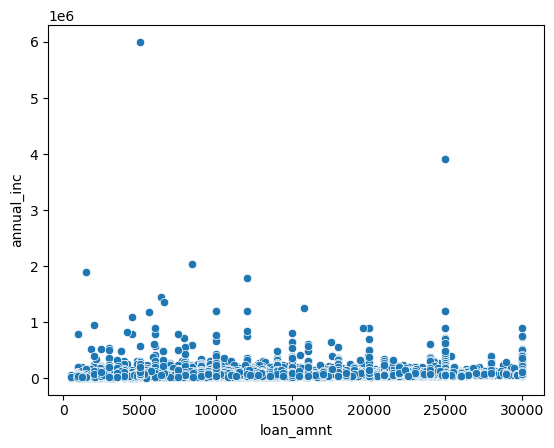

Scatter plot of : loan_amnt Vs dti


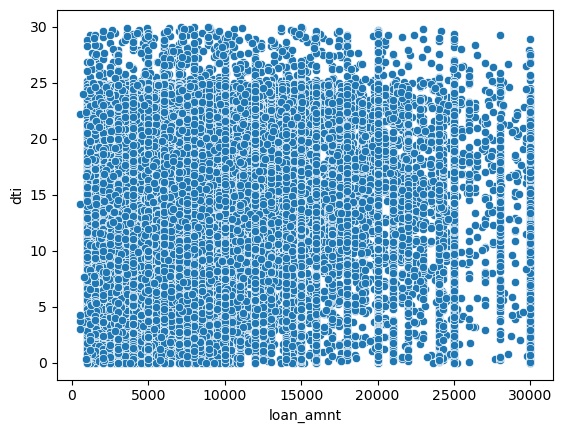

Scatter plot of : int_rate Vs loan_amnt


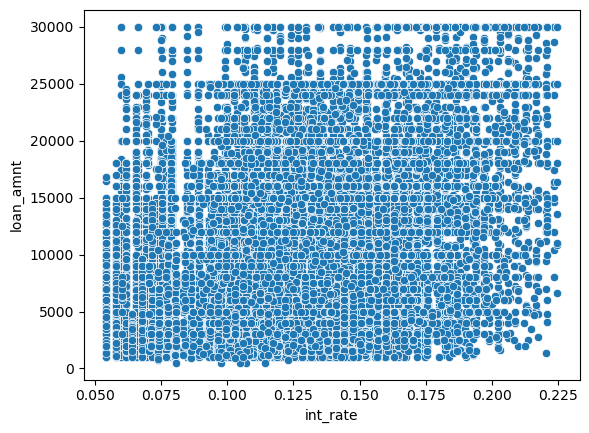

Scatter plot of : int_rate Vs int_rate


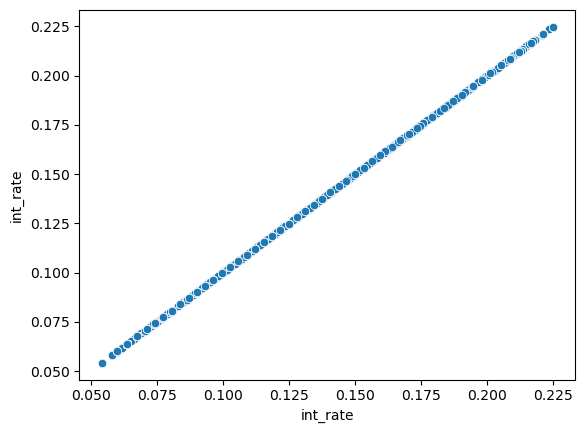

Scatter plot of : int_rate Vs emp_length


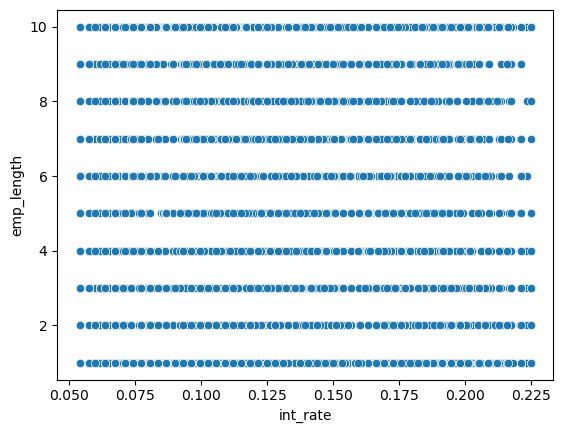

Scatter plot of : int_rate Vs annual_inc


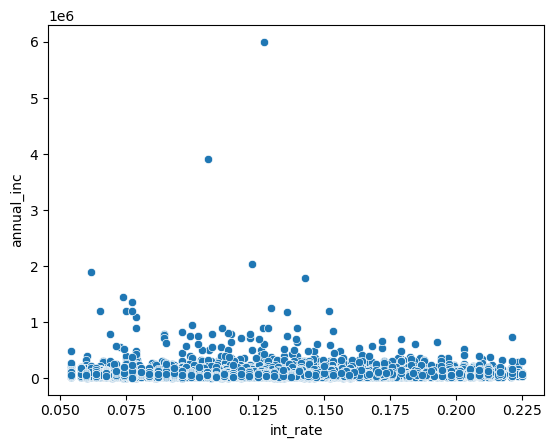

Scatter plot of : int_rate Vs dti


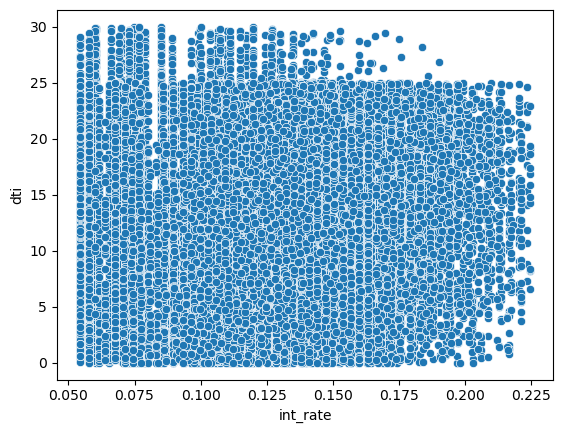

Scatter plot of : emp_length Vs loan_amnt


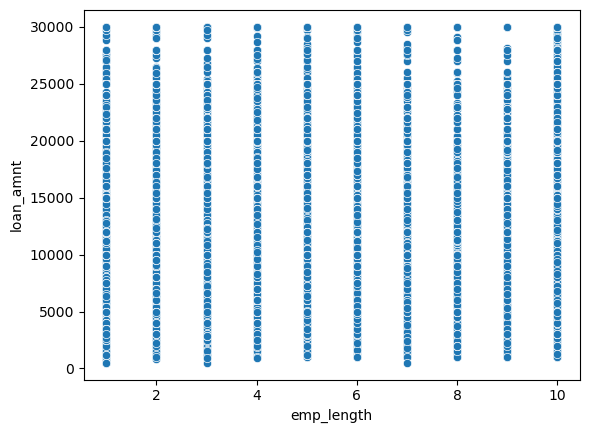

Scatter plot of : emp_length Vs int_rate


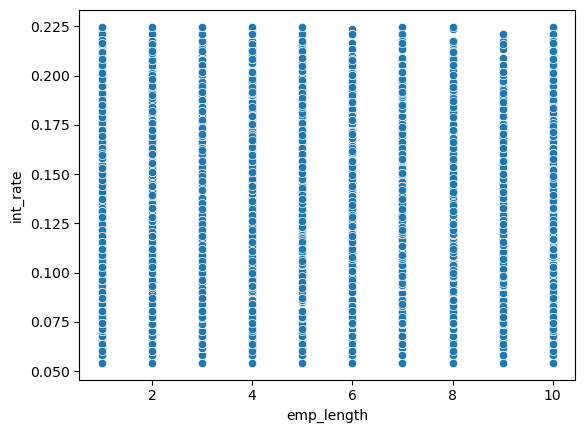

Scatter plot of : emp_length Vs emp_length


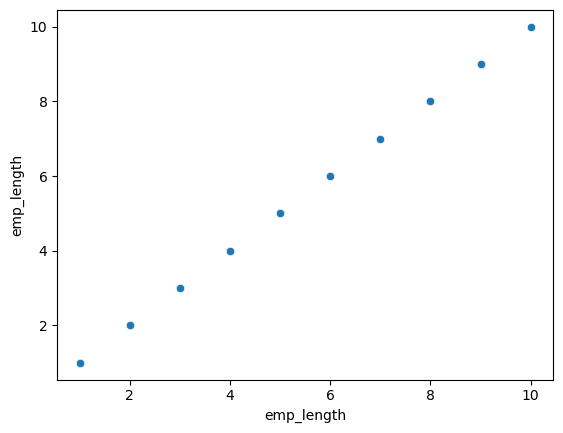

Scatter plot of : emp_length Vs annual_inc


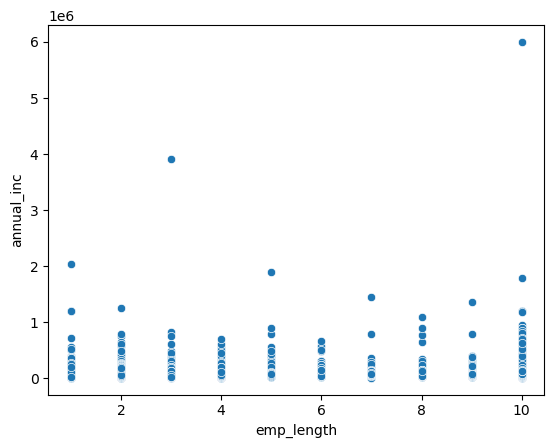

Scatter plot of : emp_length Vs dti


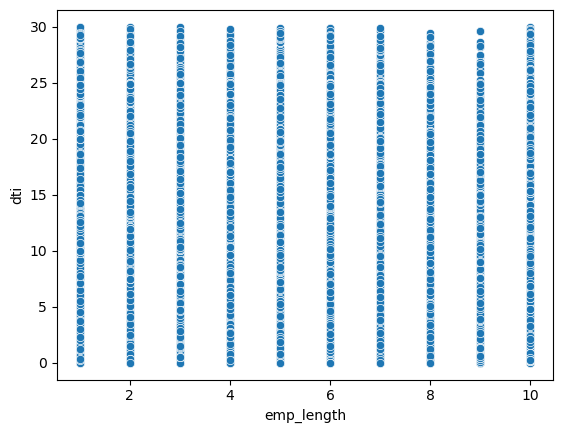

Scatter plot of : annual_inc Vs loan_amnt


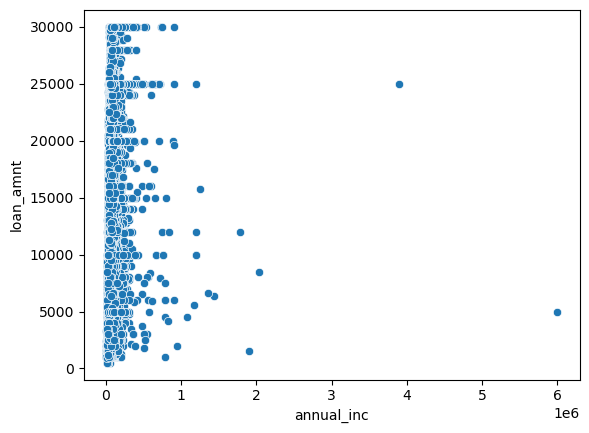

Scatter plot of : annual_inc Vs int_rate


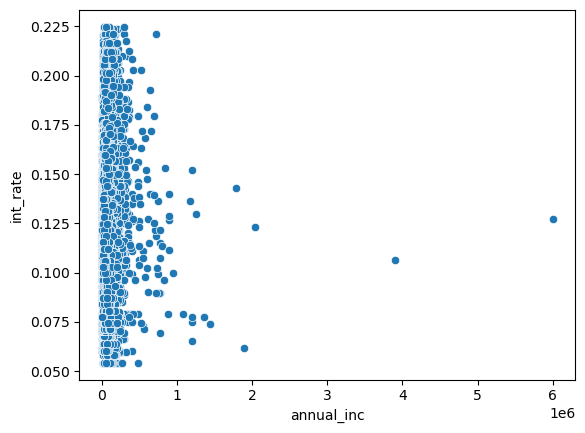

Scatter plot of : annual_inc Vs emp_length


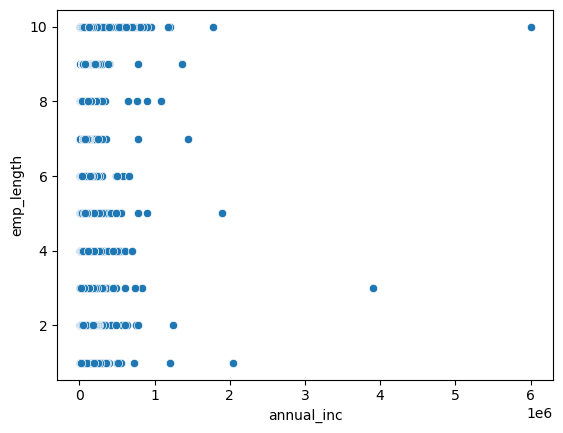

Scatter plot of : annual_inc Vs annual_inc


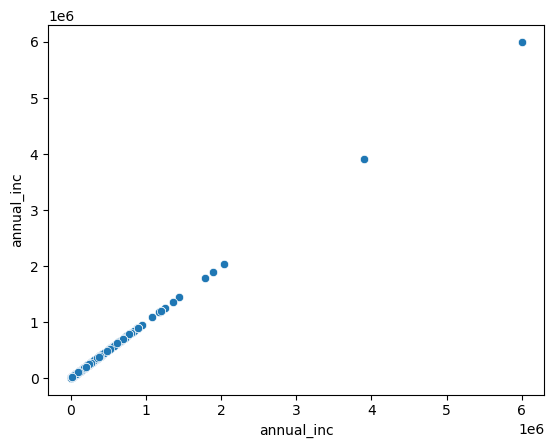

Scatter plot of : annual_inc Vs dti


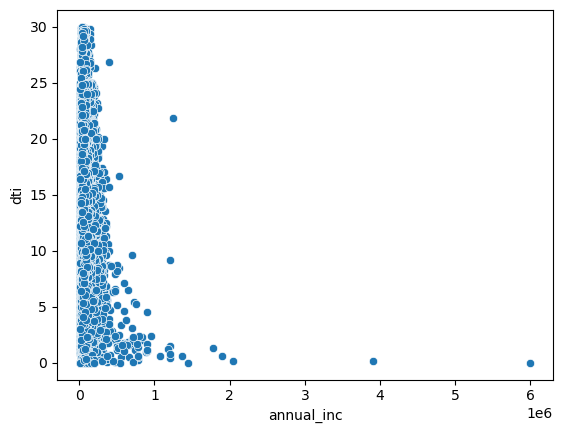

Scatter plot of : dti Vs loan_amnt


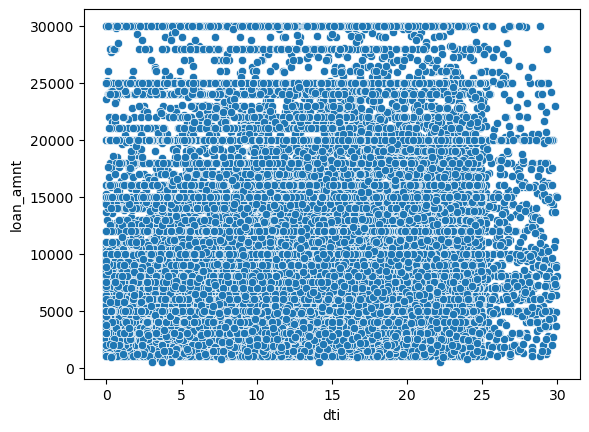

Scatter plot of : dti Vs int_rate


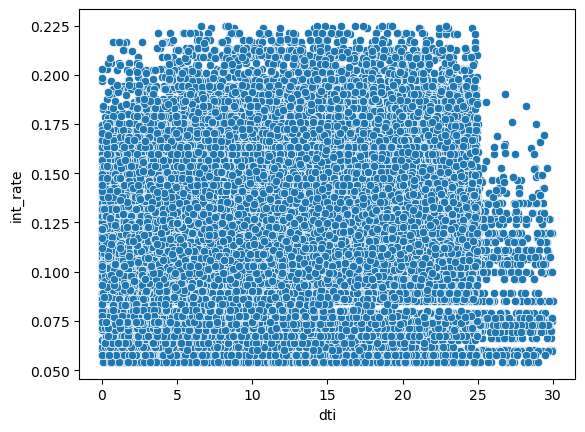

Scatter plot of : dti Vs emp_length


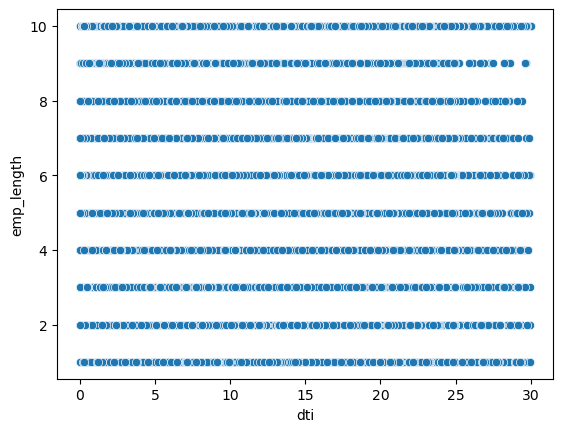

Scatter plot of : dti Vs annual_inc


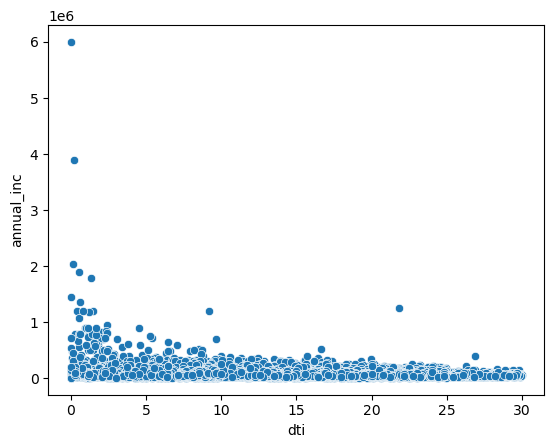

Scatter plot of : dti Vs dti


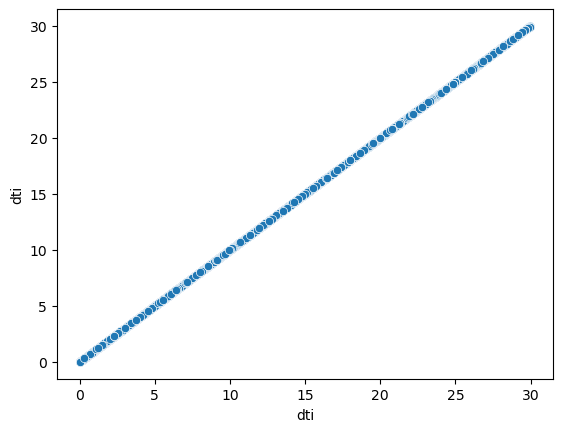

In [77]:
for col1 in updated_num_cols:
    for col2 in updated_num_cols:
        print("Scatter plot of :", col1, "Vs", col2)
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.show()

Box plot of : loan_amnt Vs loan_amnt


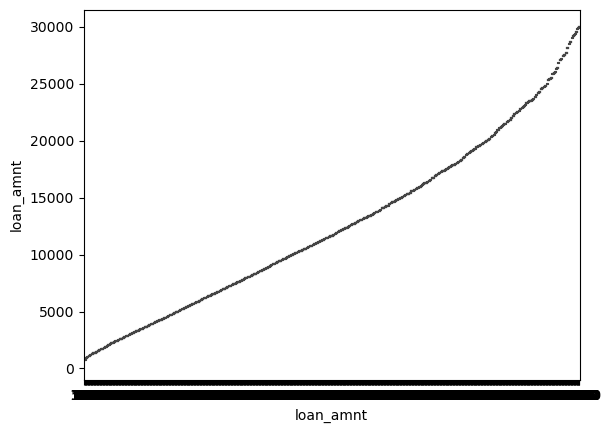

Box plot of : loan_amnt Vs int_rate


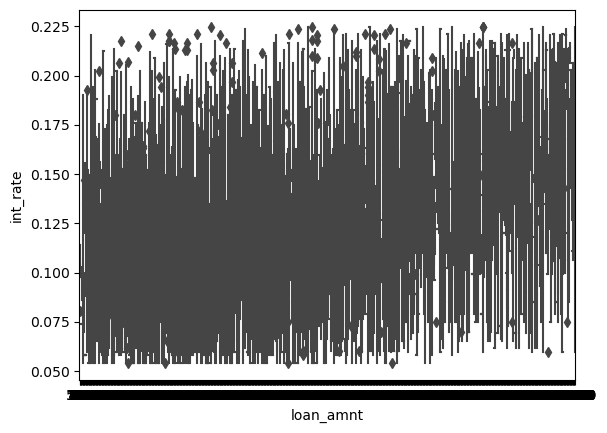

Box plot of : loan_amnt Vs emp_length


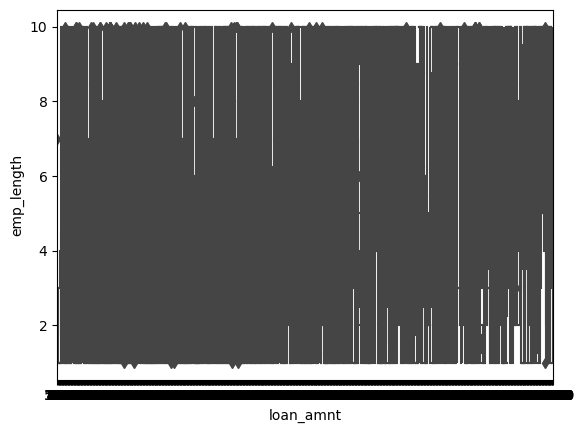

Box plot of : loan_amnt Vs annual_inc


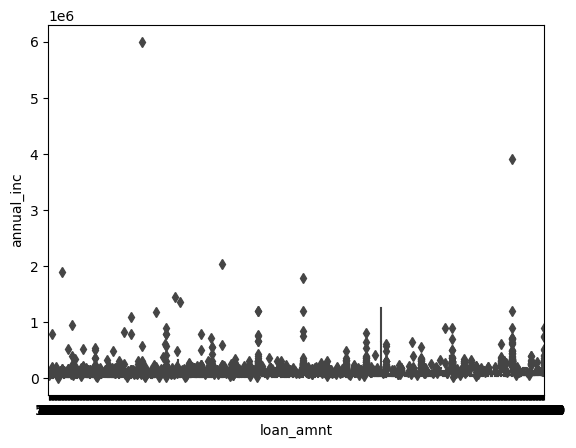

Box plot of : loan_amnt Vs dti


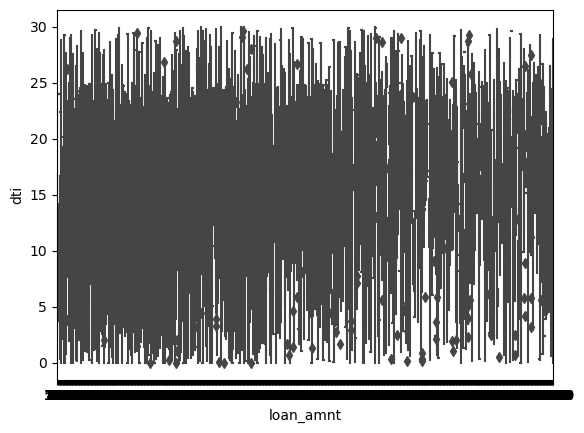

Box plot of : int_rate Vs loan_amnt


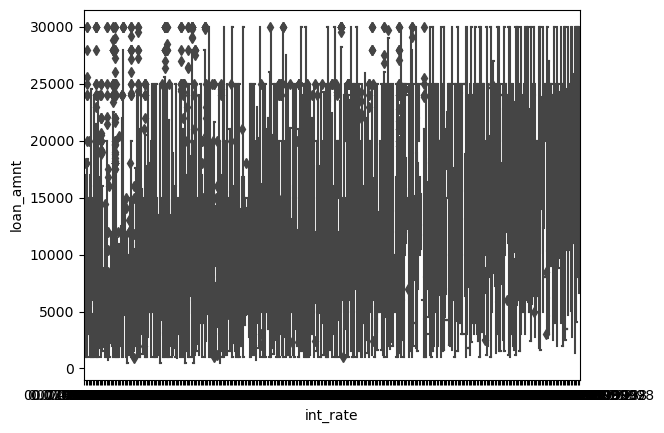

Box plot of : int_rate Vs int_rate


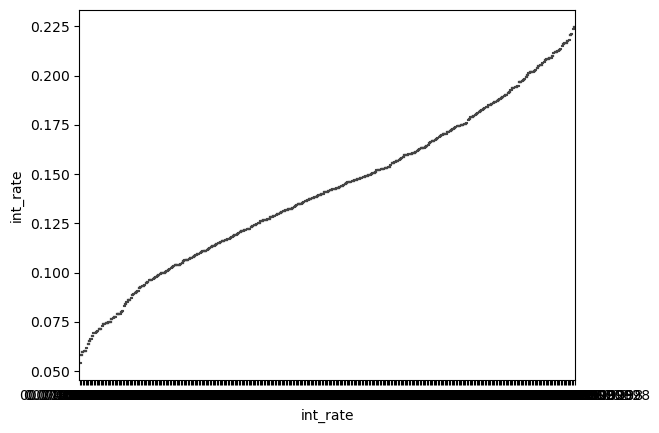

Box plot of : int_rate Vs emp_length


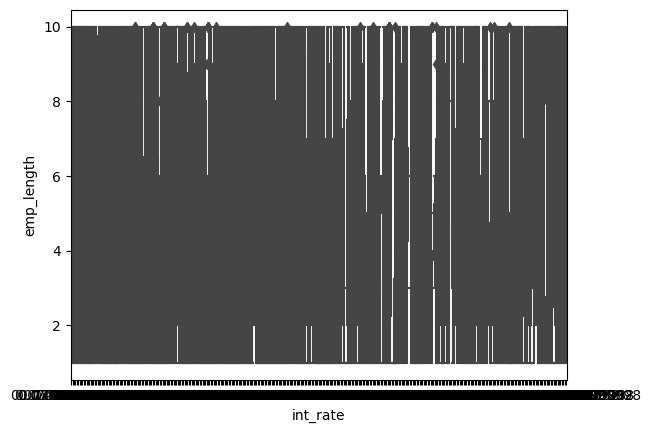

Box plot of : int_rate Vs annual_inc


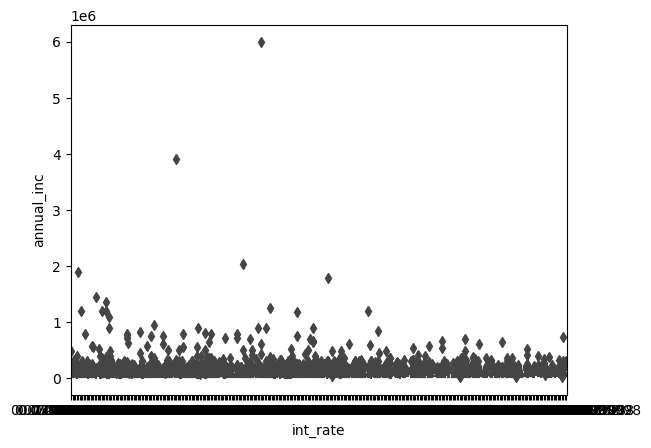

Box plot of : int_rate Vs dti


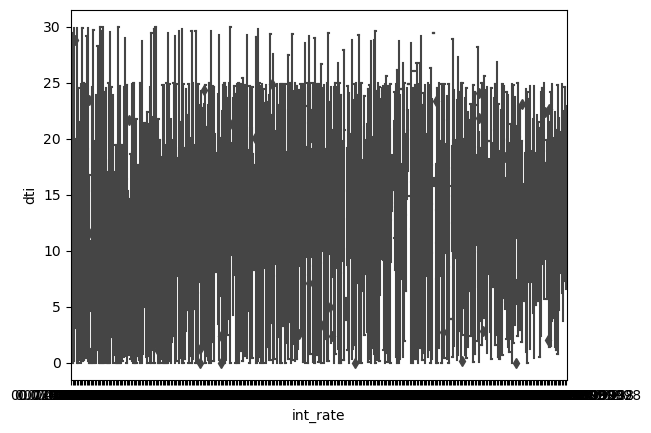

Box plot of : emp_length Vs loan_amnt


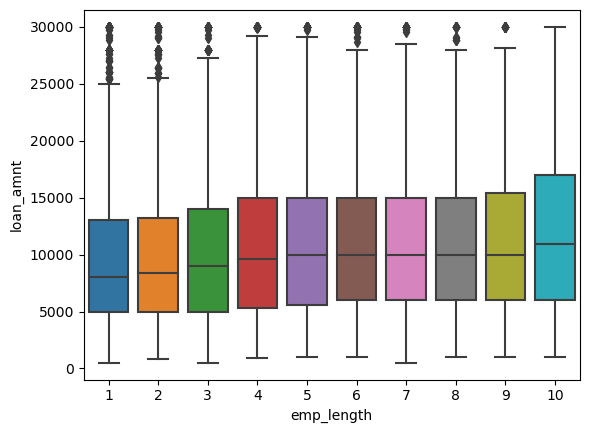

Box plot of : emp_length Vs int_rate


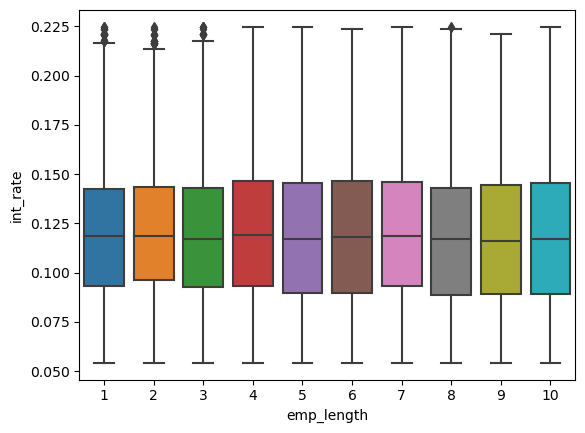

Box plot of : emp_length Vs emp_length


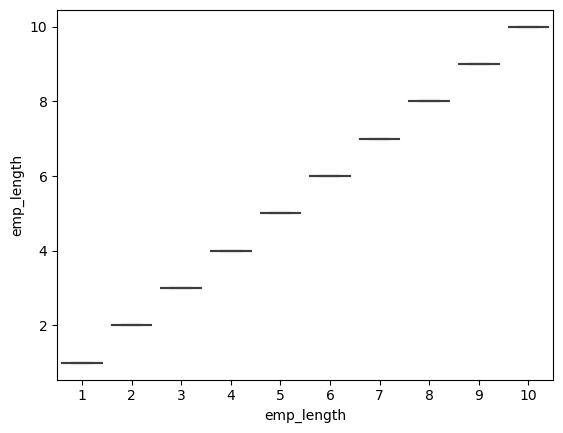

Box plot of : emp_length Vs annual_inc


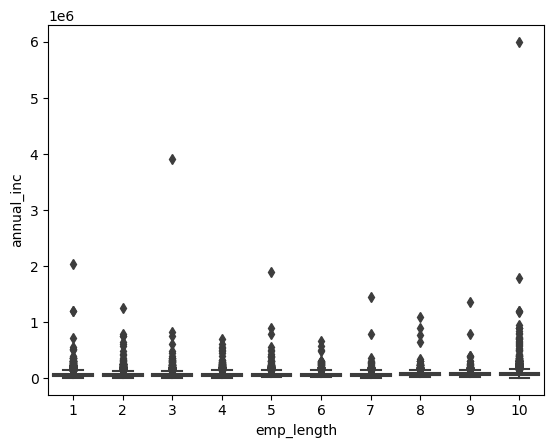

Box plot of : emp_length Vs dti


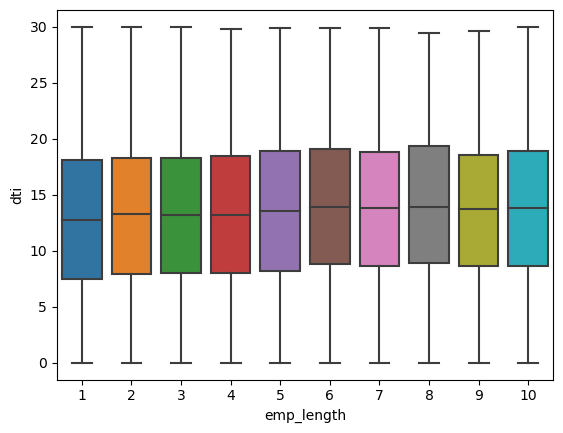

Box plot of : annual_inc Vs loan_amnt


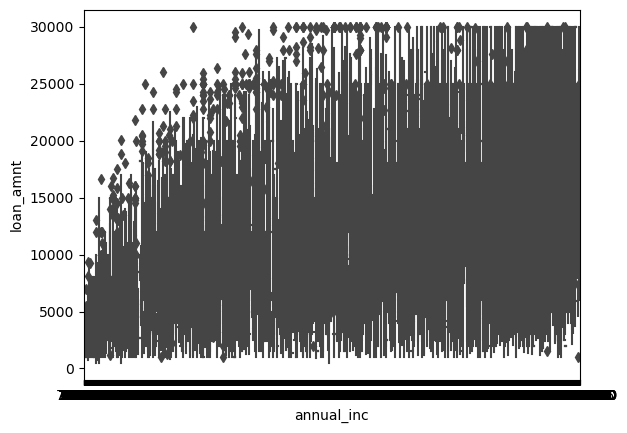

Box plot of : annual_inc Vs int_rate


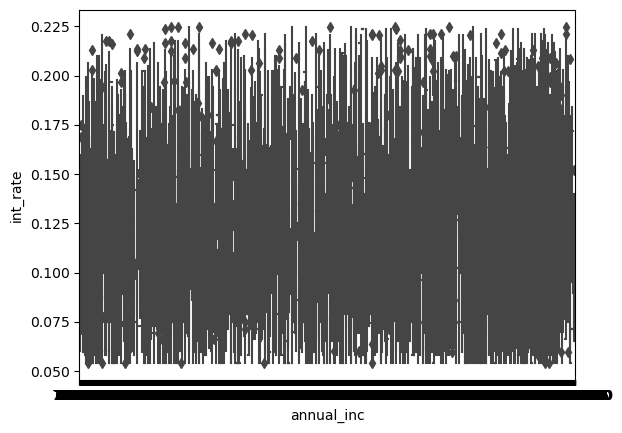

Box plot of : annual_inc Vs emp_length


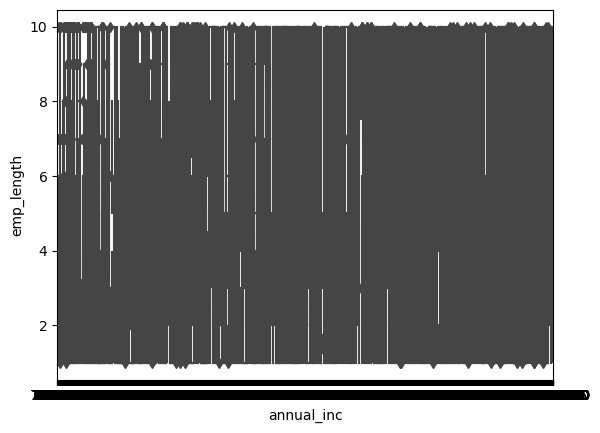

Box plot of : annual_inc Vs annual_inc


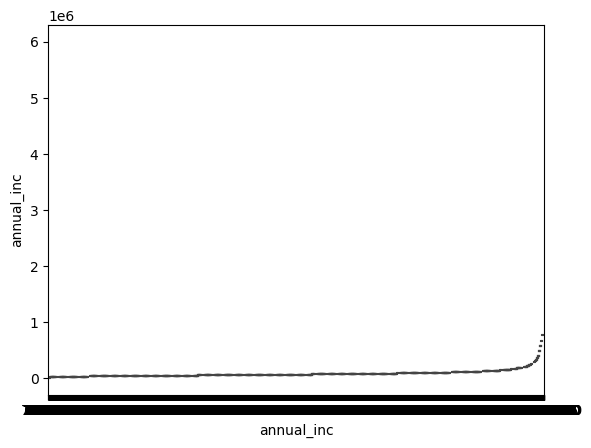

Box plot of : annual_inc Vs dti


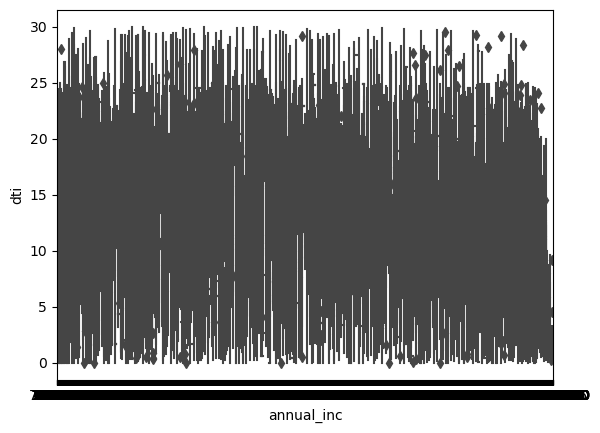

Box plot of : dti Vs loan_amnt


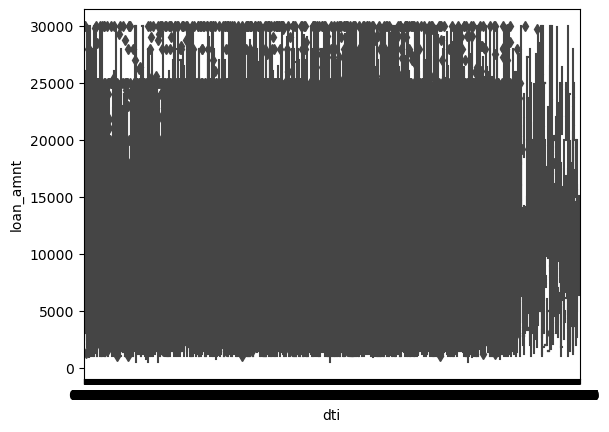

Box plot of : dti Vs int_rate


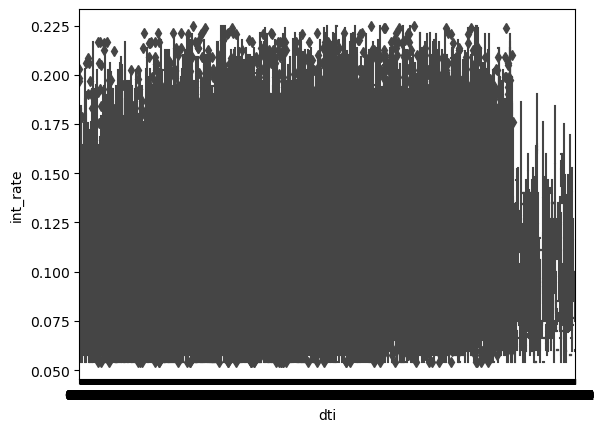

Box plot of : dti Vs emp_length


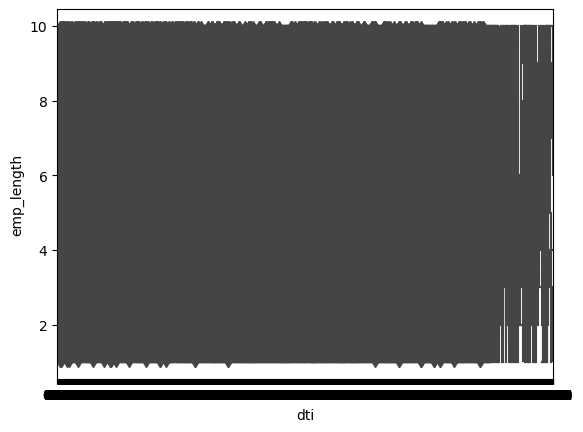

Box plot of : dti Vs annual_inc


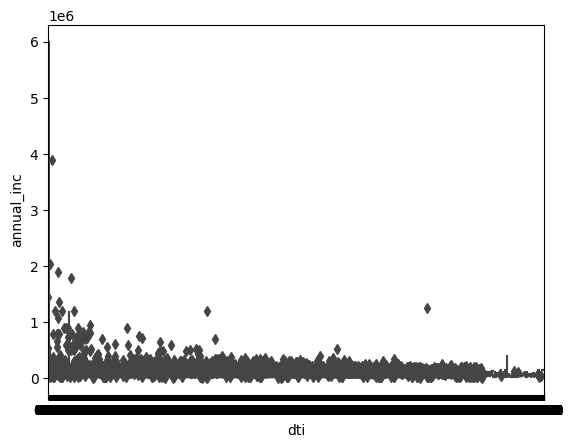

Box plot of : dti Vs dti


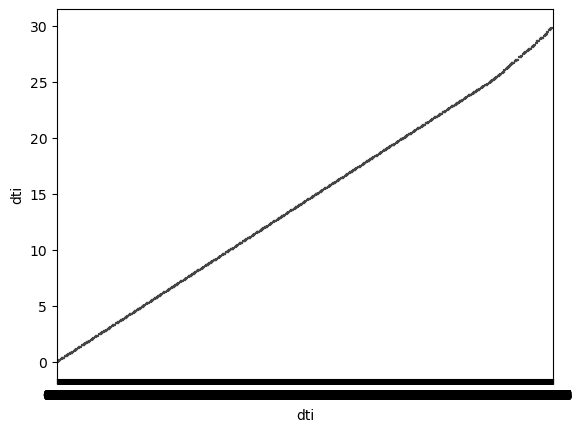

In [78]:
for col1 in updated_num_cols:
    for col2 in updated_num_cols:
        print("Box plot of :", col1, "Vs", col2)
        sns.boxplot(x=df[col1], y=df[col2])
        plt.show()

Observation
1. The higher the loan amount the interest is higher
2. Employees with less employee length like 1, 2, 3 years have taken loans and there are outliers with high loan_amnt


Bi-Variate Analysis for Numerical vs Catogerical Columns 

Box Plot of : loan_amnt Vs term


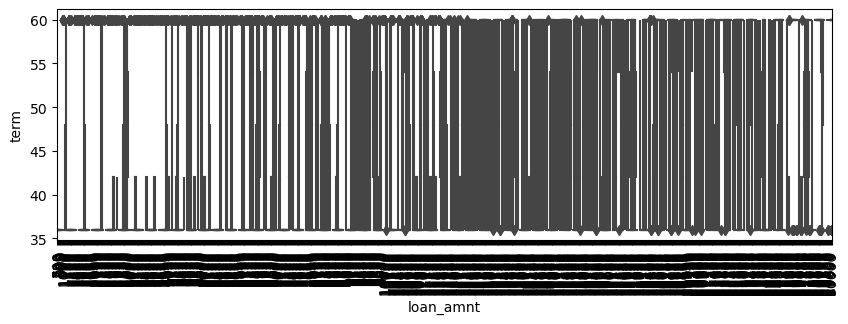

Box Plot of : loan_amnt Vs grade


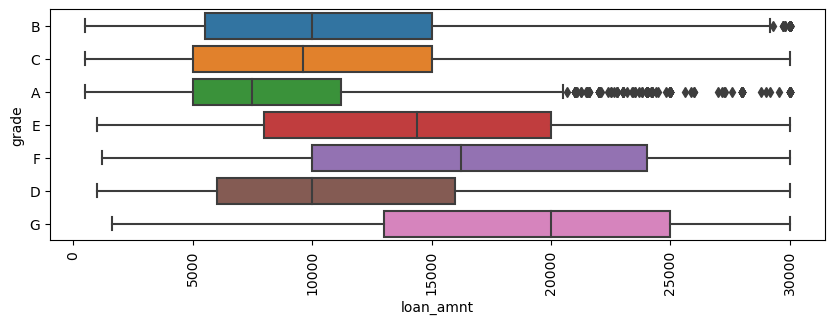

Box Plot of : loan_amnt Vs sub_grade


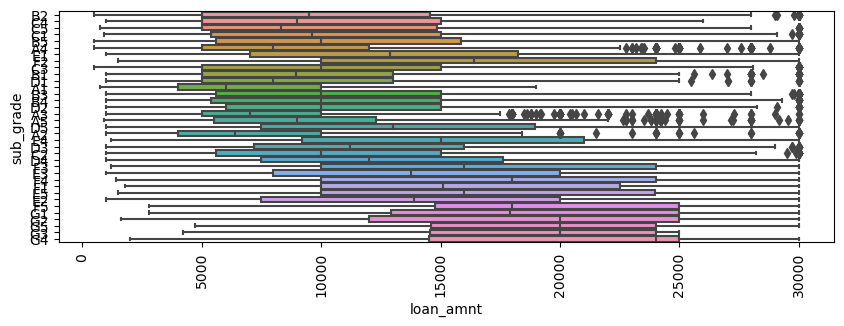

Box Plot of : loan_amnt Vs home_ownership


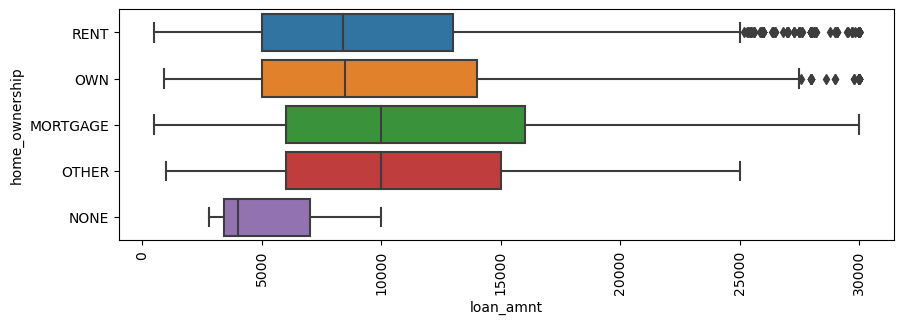

Box Plot of : loan_amnt Vs loan_status


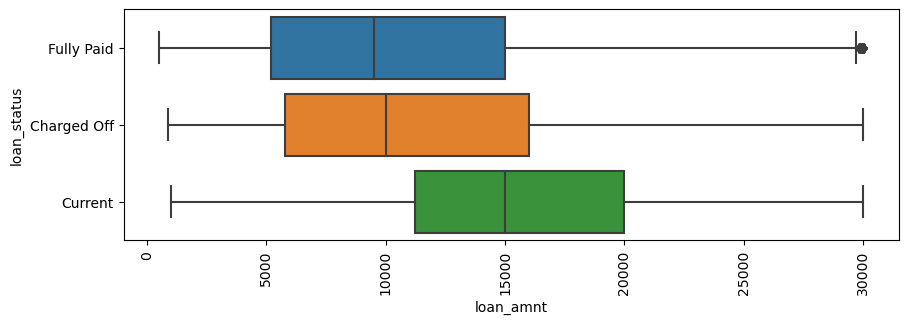

Box Plot of : loan_amnt Vs purpose


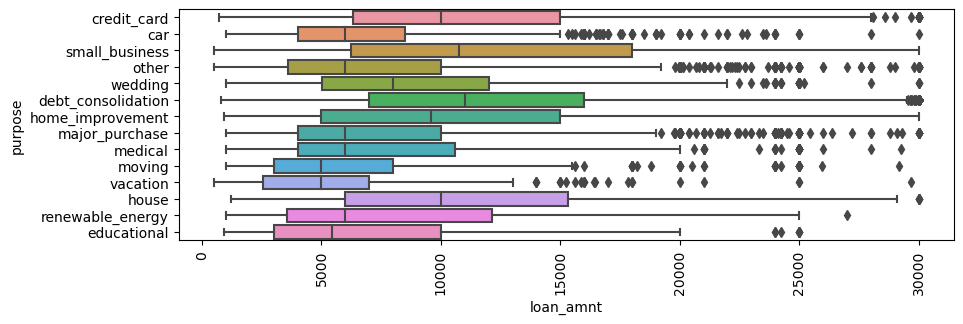

Box Plot of : loan_amnt Vs pub_rec_bankruptcies


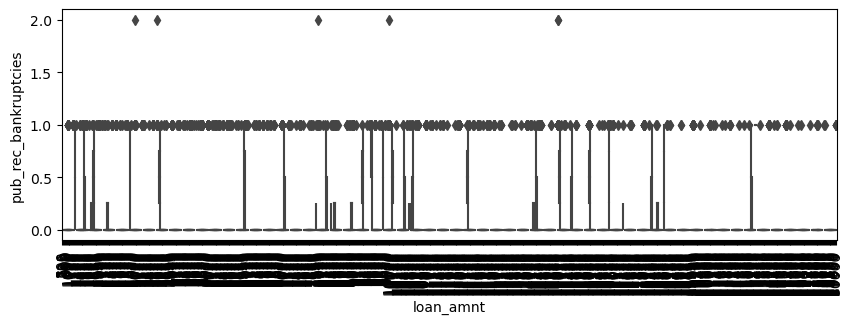

Box Plot of : loan_amnt Vs total_acc


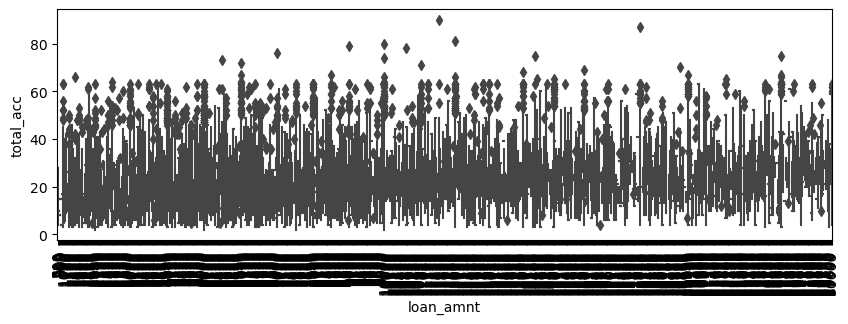

Box Plot of : loan_amnt Vs pub_rec


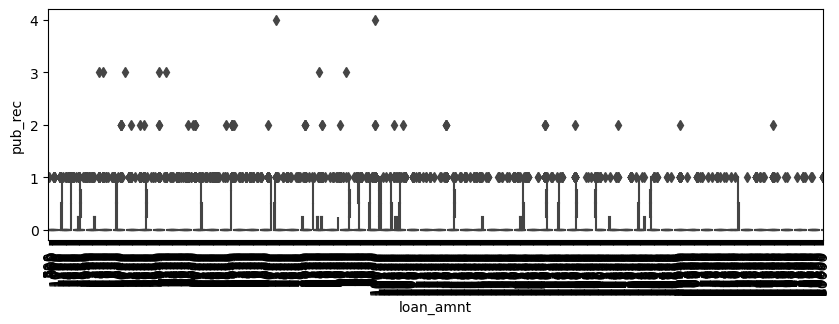

Box Plot of : loan_amnt Vs open_acc


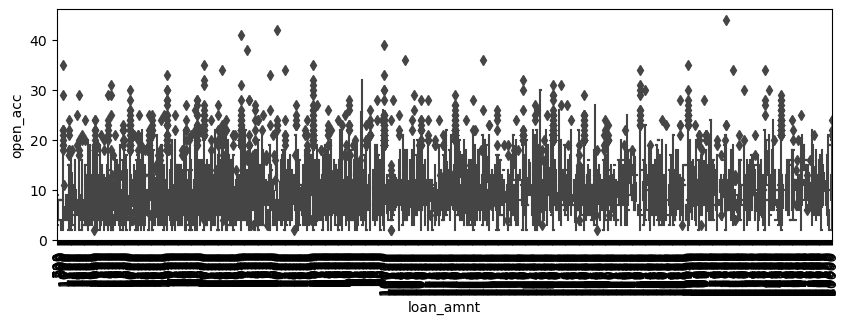

Box Plot of : loan_amnt Vs delinq_2yrs


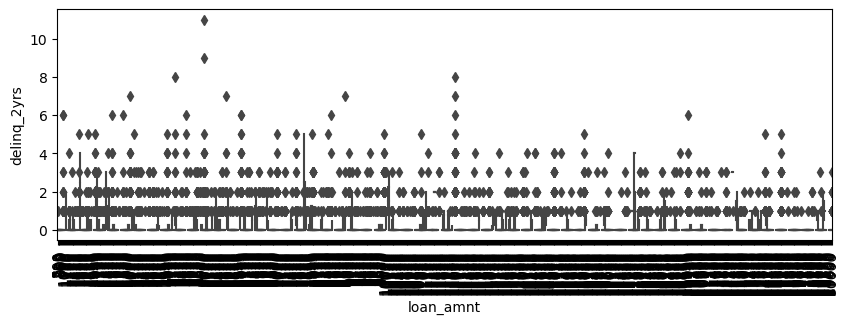

Box Plot of : loan_amnt Vs addr_state


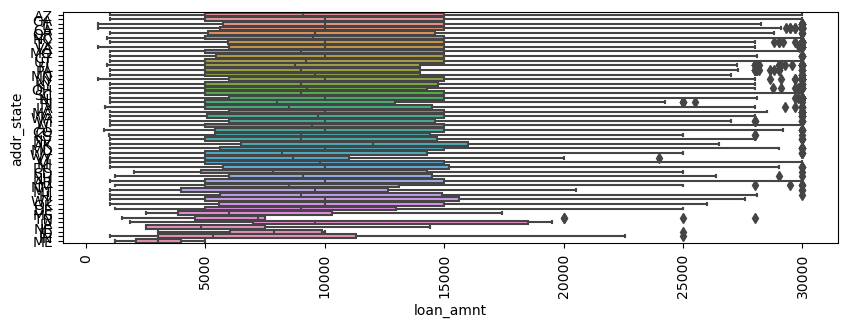

Box Plot of : int_rate Vs term


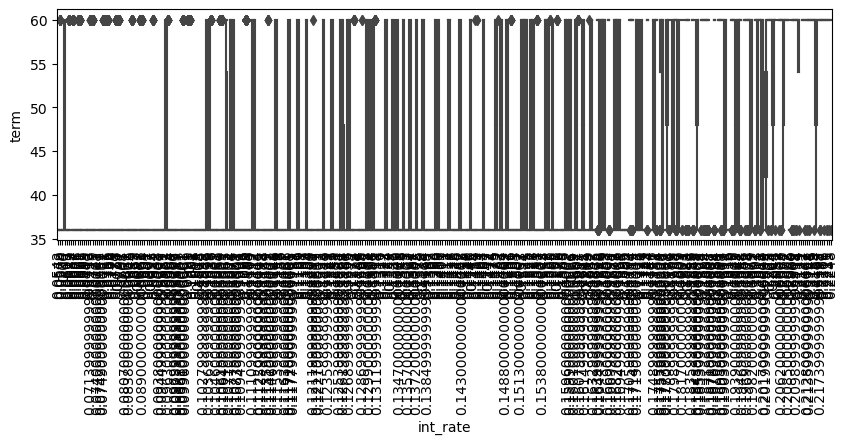

Box Plot of : int_rate Vs grade


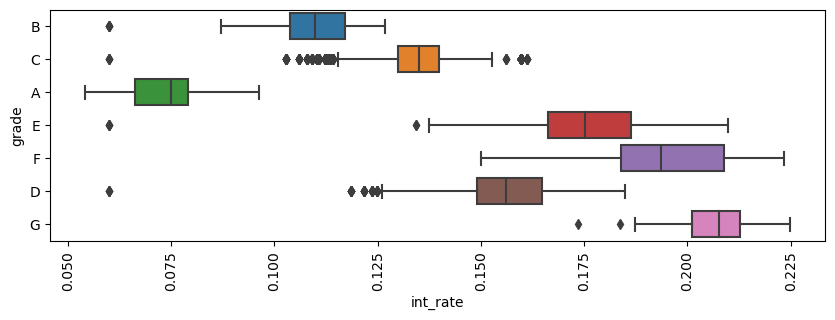

Box Plot of : int_rate Vs sub_grade


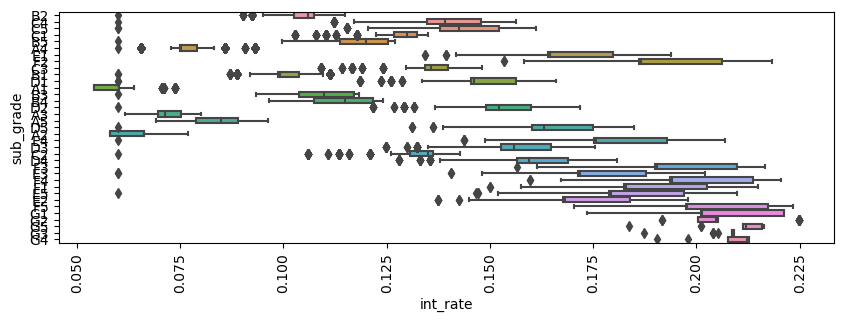

Box Plot of : int_rate Vs home_ownership


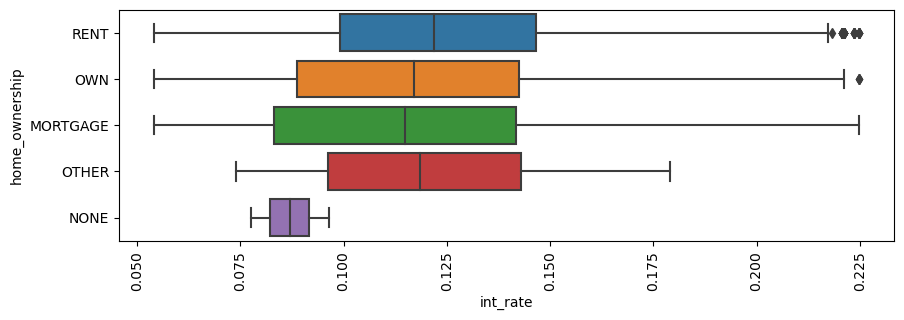

Box Plot of : int_rate Vs loan_status


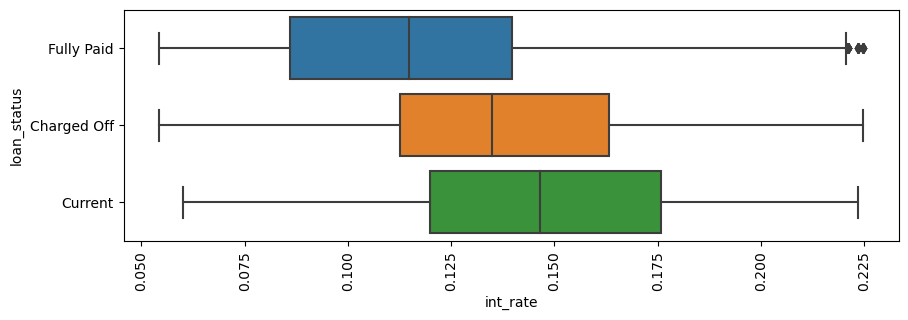

Box Plot of : int_rate Vs purpose


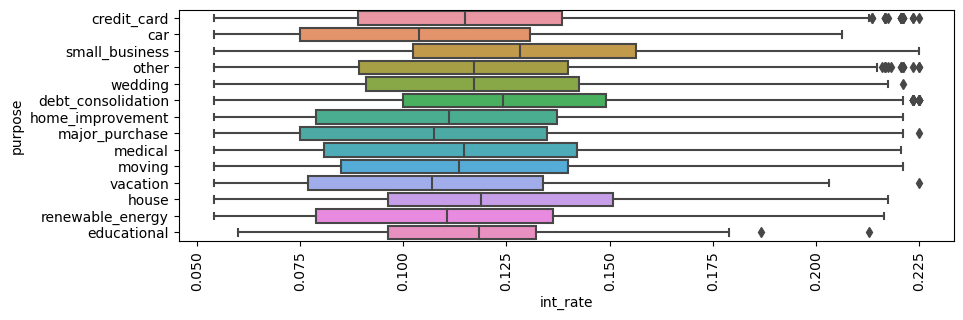

Box Plot of : int_rate Vs pub_rec_bankruptcies


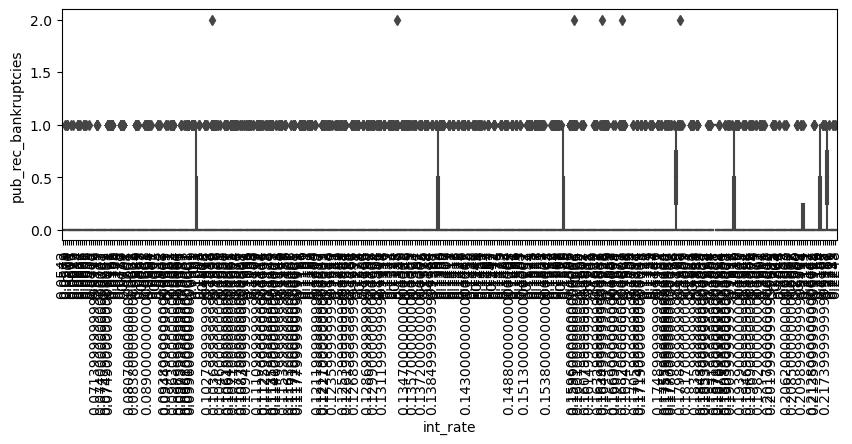

Box Plot of : int_rate Vs total_acc


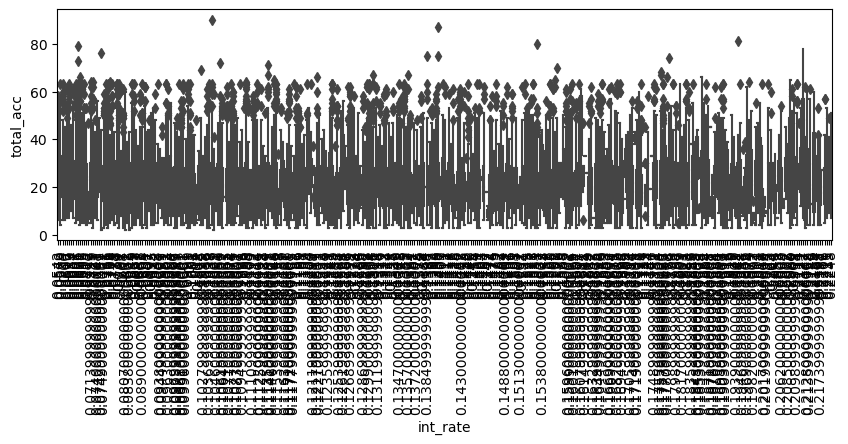

Box Plot of : int_rate Vs pub_rec


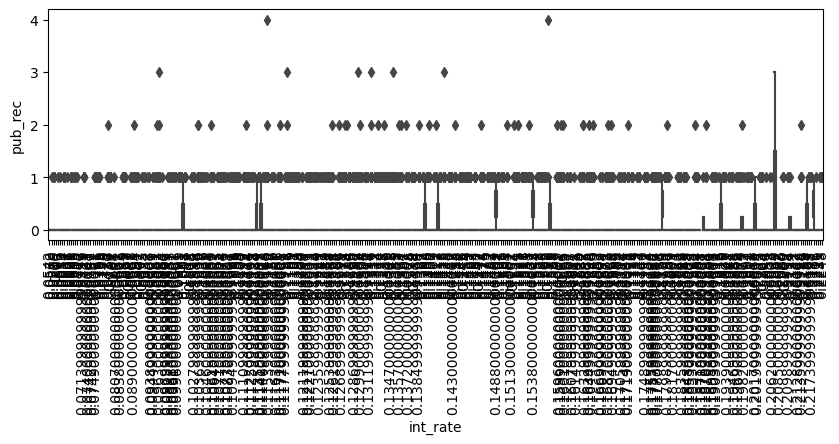

Box Plot of : int_rate Vs open_acc


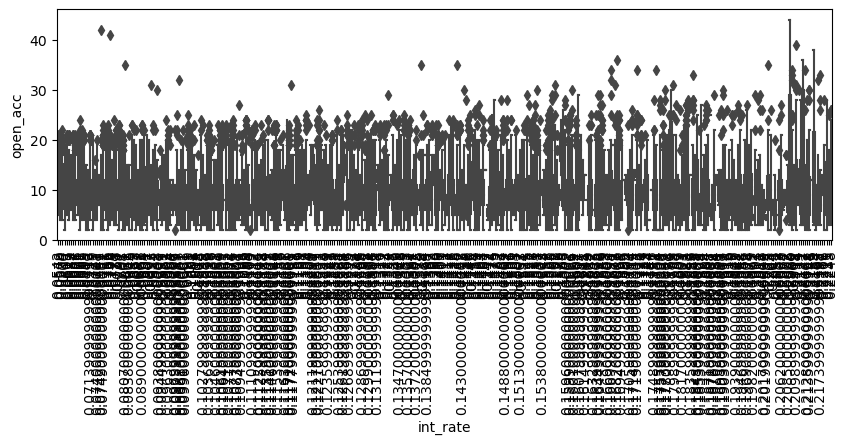

Box Plot of : int_rate Vs delinq_2yrs


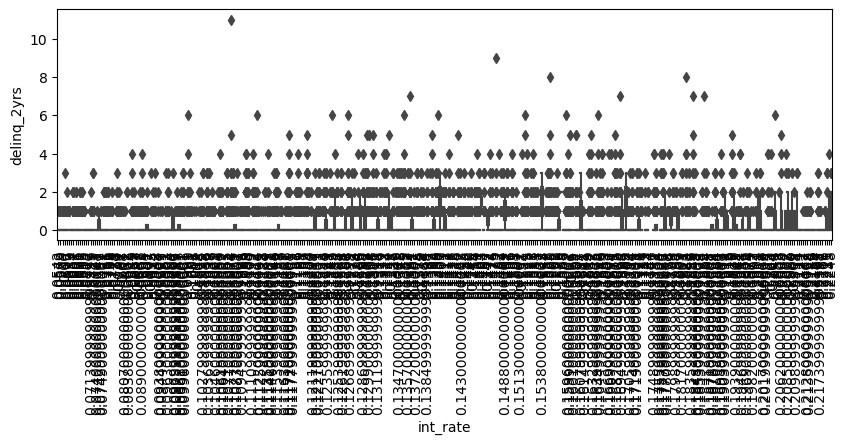

Box Plot of : int_rate Vs addr_state


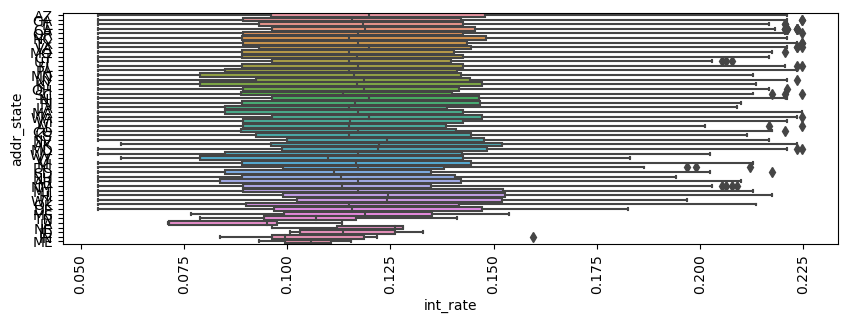

Box Plot of : emp_length Vs term


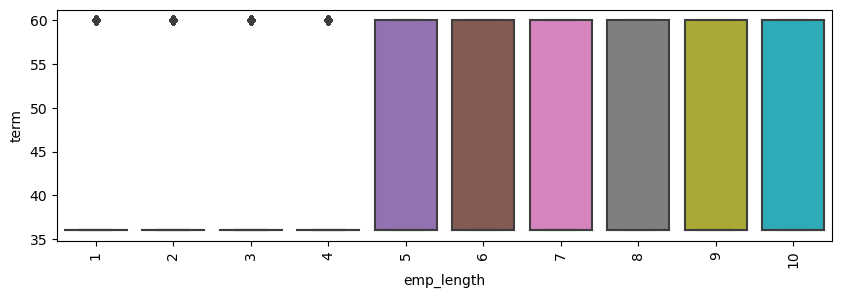

Box Plot of : emp_length Vs grade


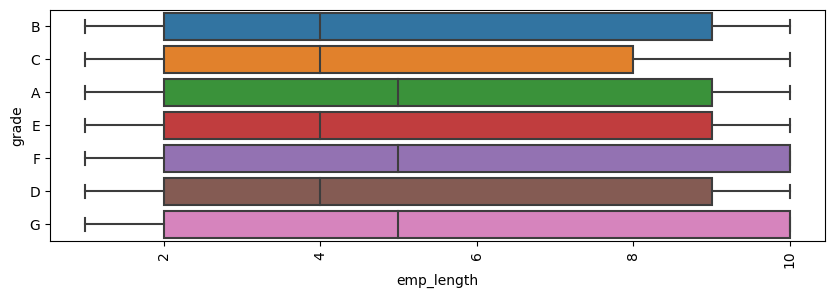

Box Plot of : emp_length Vs sub_grade


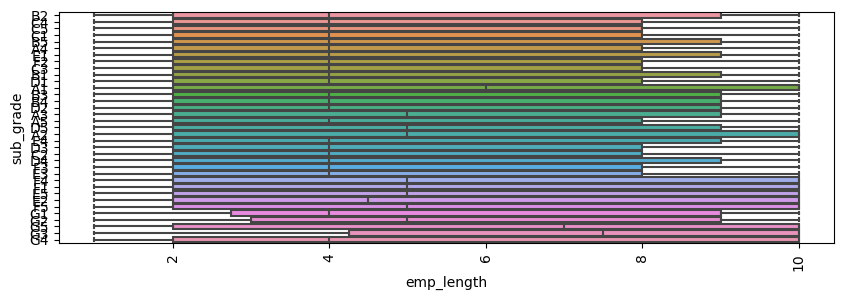

Box Plot of : emp_length Vs home_ownership


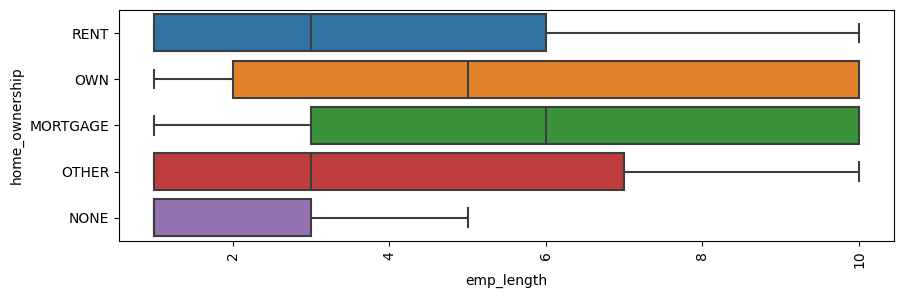

Box Plot of : emp_length Vs loan_status


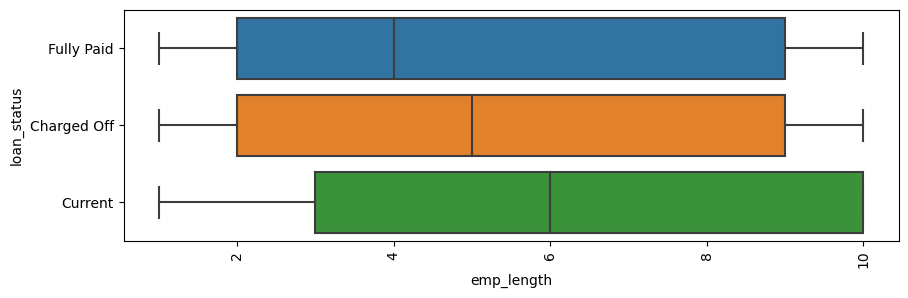

Box Plot of : emp_length Vs purpose


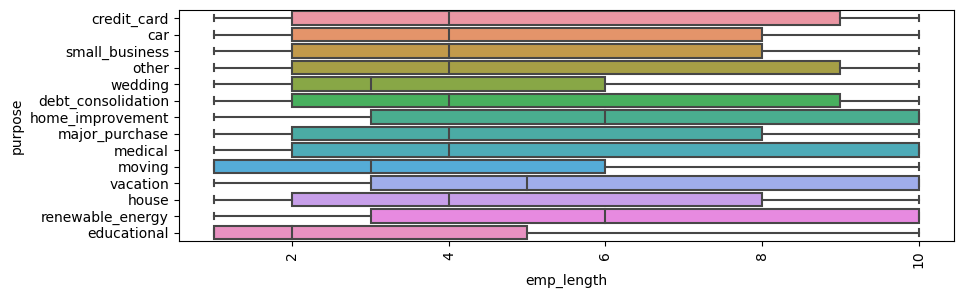

Box Plot of : emp_length Vs pub_rec_bankruptcies


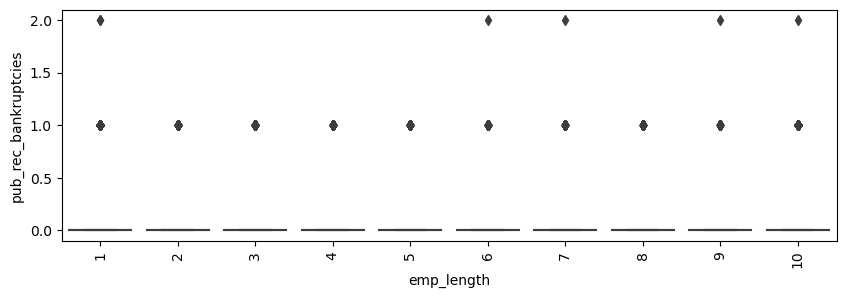

Box Plot of : emp_length Vs total_acc


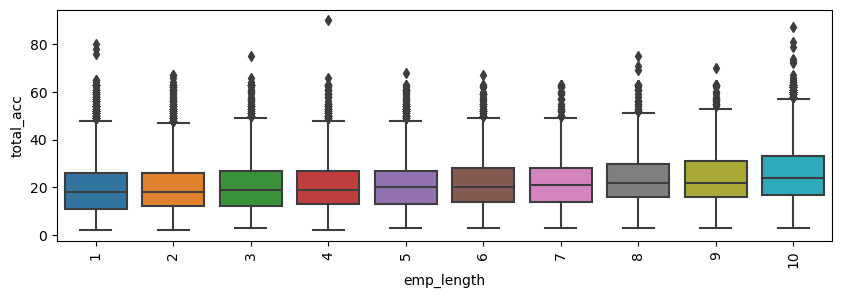

Box Plot of : emp_length Vs pub_rec


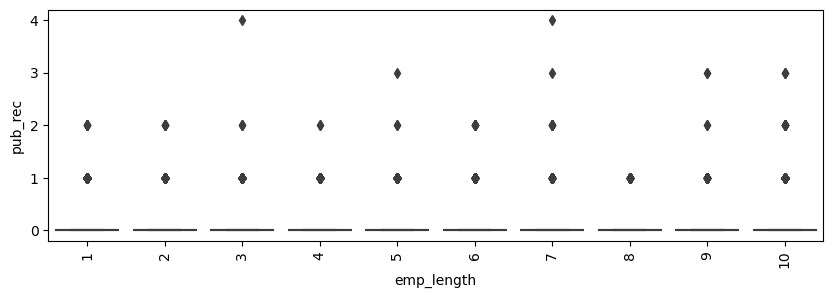

Box Plot of : emp_length Vs open_acc


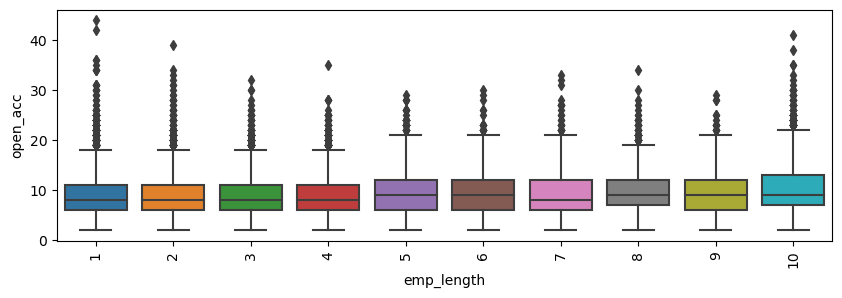

Box Plot of : emp_length Vs delinq_2yrs


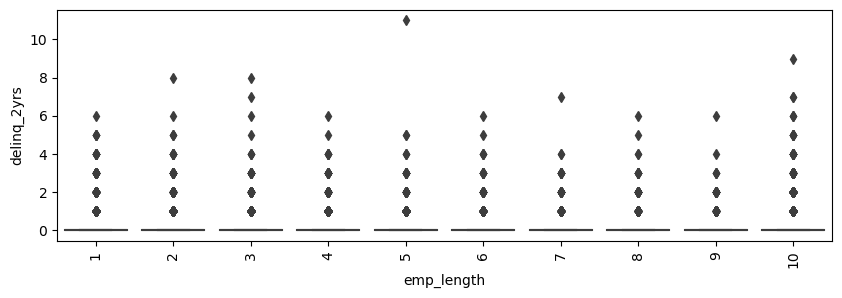

Box Plot of : emp_length Vs addr_state


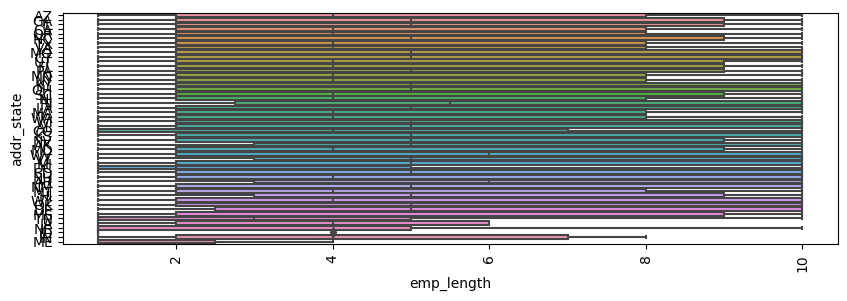

Box Plot of : annual_inc Vs term


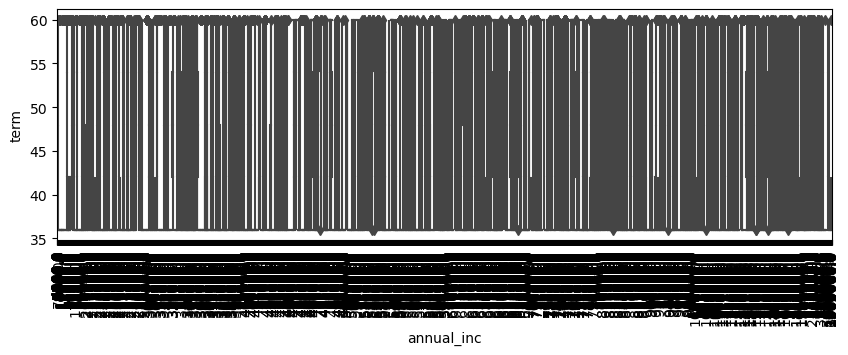

Box Plot of : annual_inc Vs grade


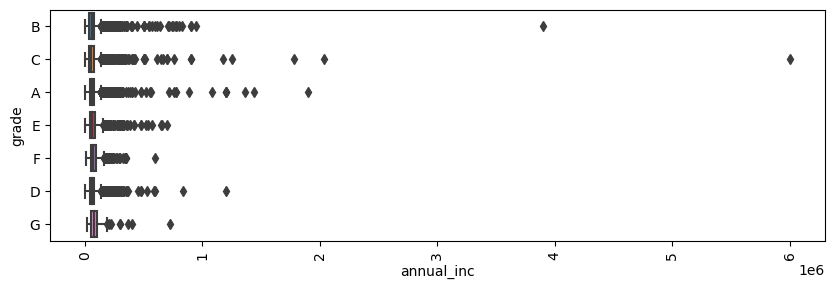

Box Plot of : annual_inc Vs sub_grade


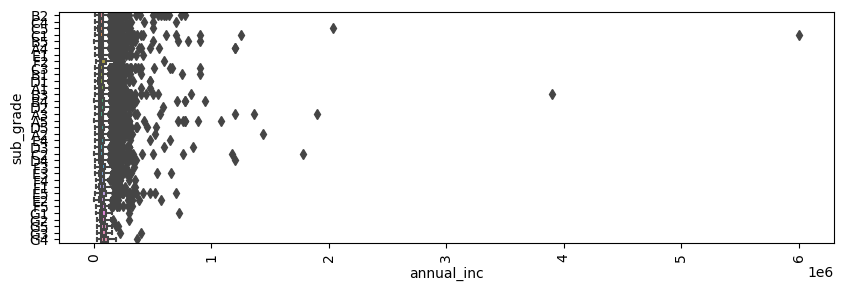

Box Plot of : annual_inc Vs home_ownership


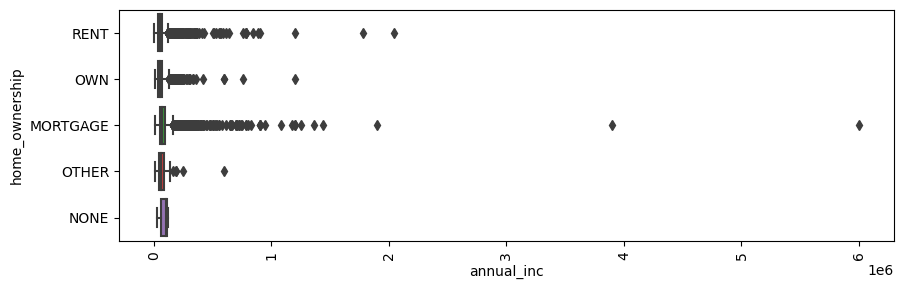

Box Plot of : annual_inc Vs loan_status


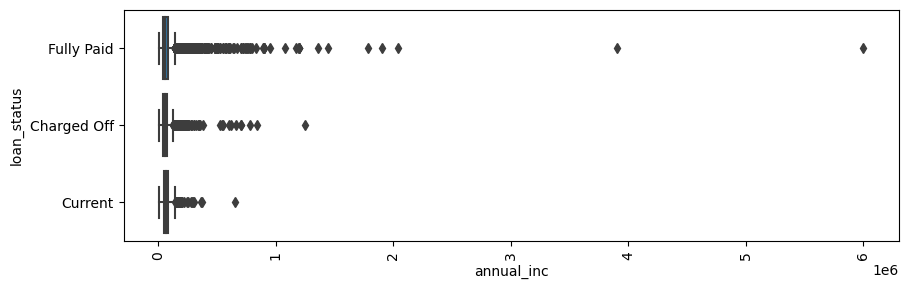

Box Plot of : annual_inc Vs purpose


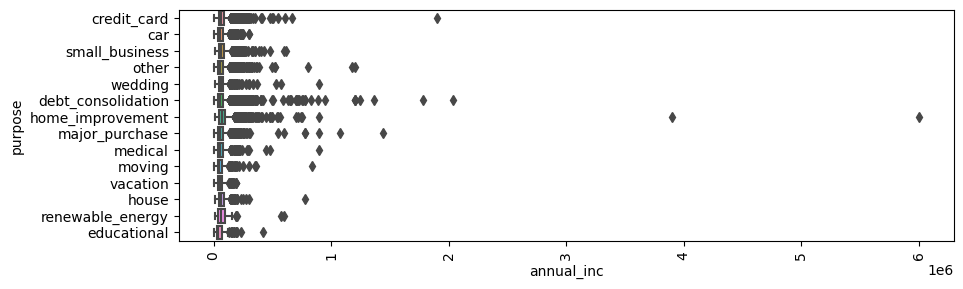

Box Plot of : annual_inc Vs pub_rec_bankruptcies


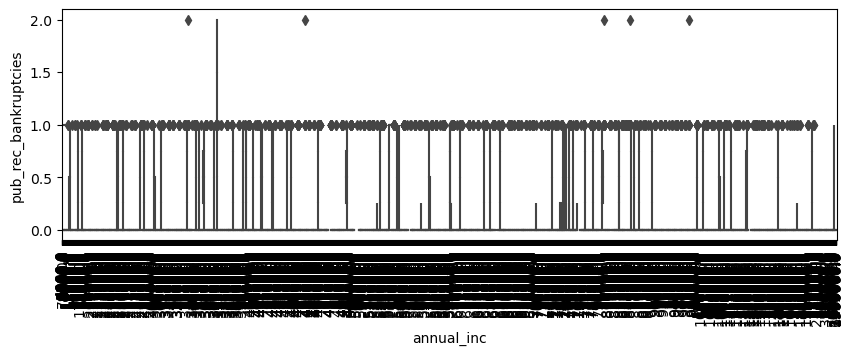

Box Plot of : annual_inc Vs total_acc


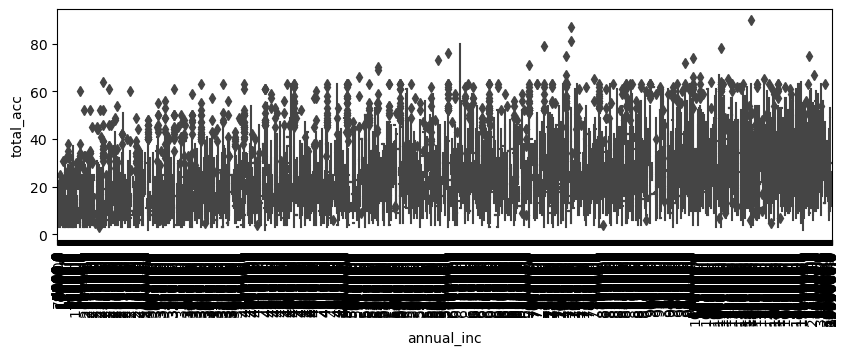

Box Plot of : annual_inc Vs pub_rec


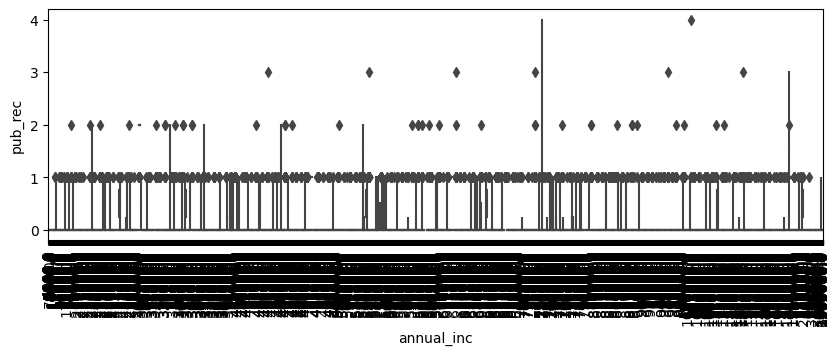

Box Plot of : annual_inc Vs open_acc


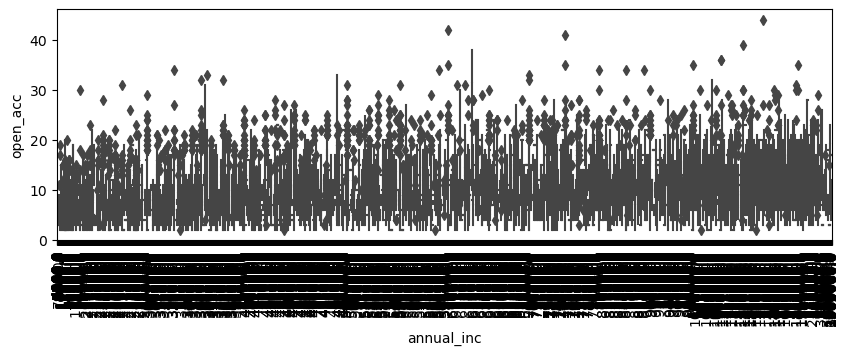

Box Plot of : annual_inc Vs delinq_2yrs


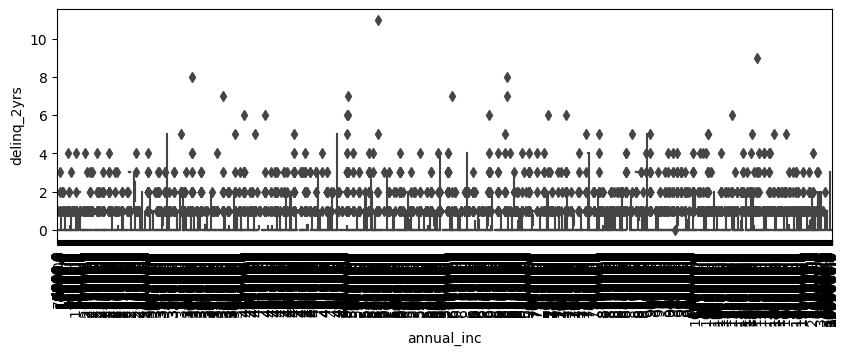

Box Plot of : annual_inc Vs addr_state


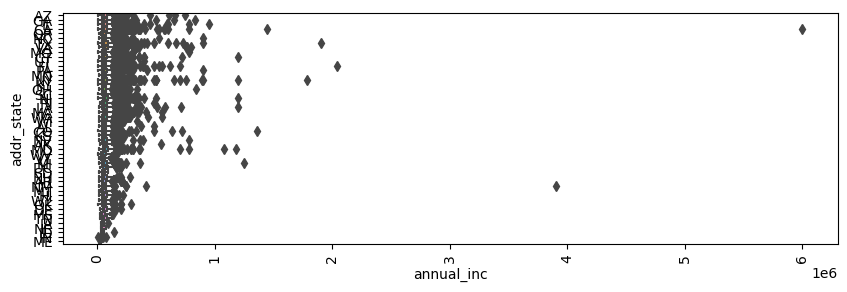

Box Plot of : dti Vs term


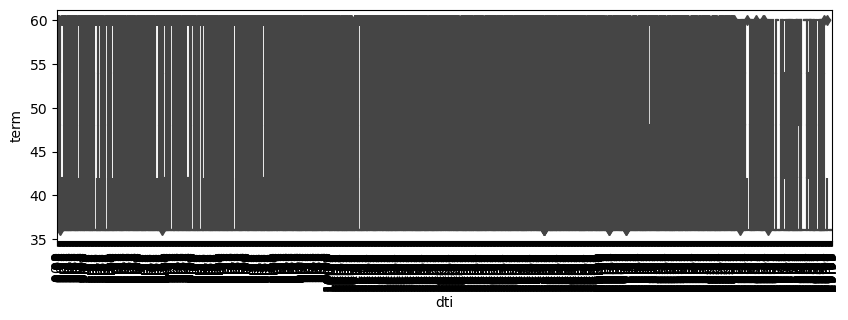

Box Plot of : dti Vs grade


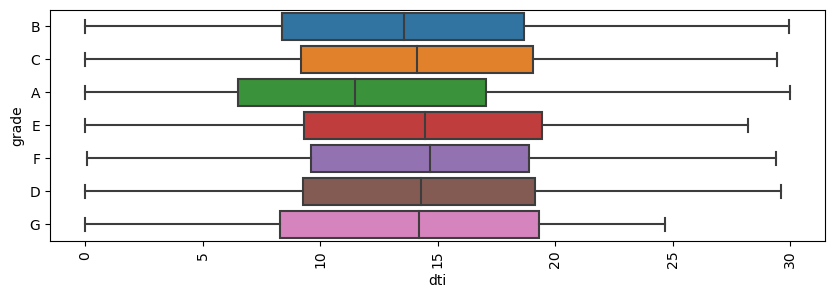

Box Plot of : dti Vs sub_grade


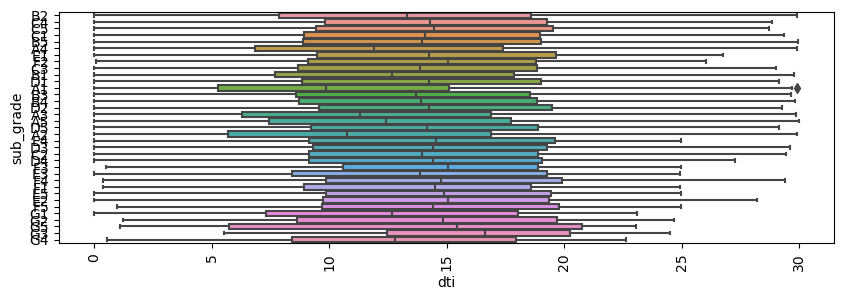

Box Plot of : dti Vs home_ownership


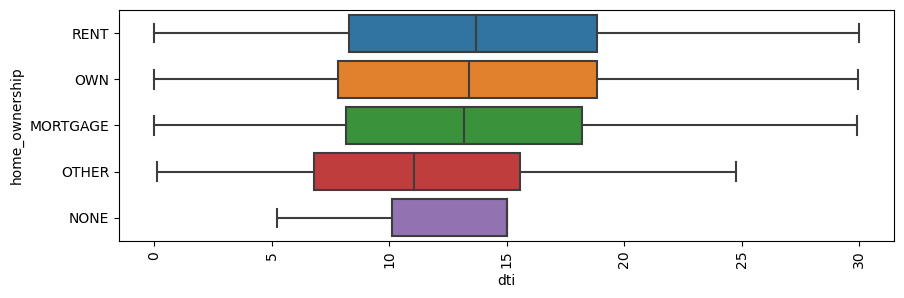

Box Plot of : dti Vs loan_status


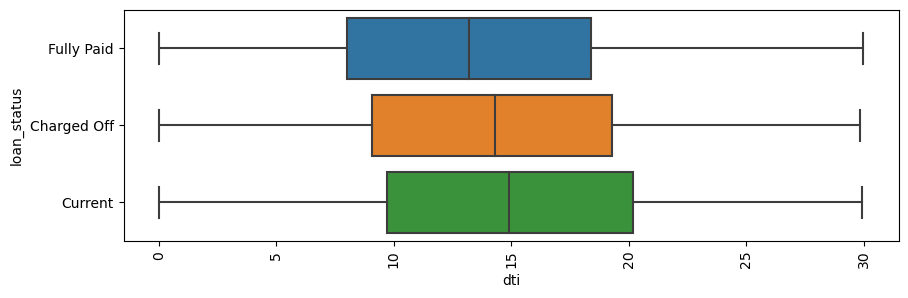

Box Plot of : dti Vs purpose


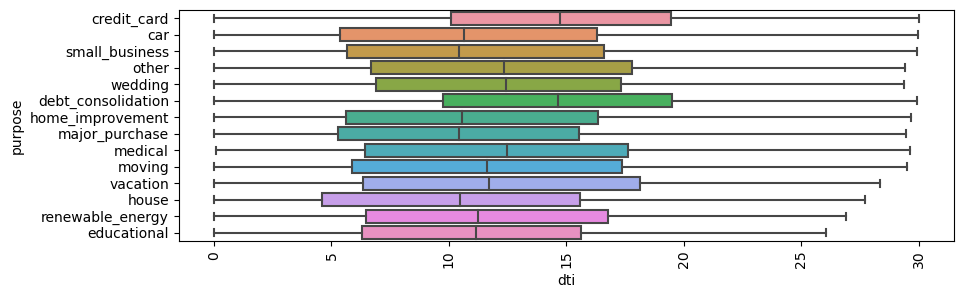

Box Plot of : dti Vs pub_rec_bankruptcies


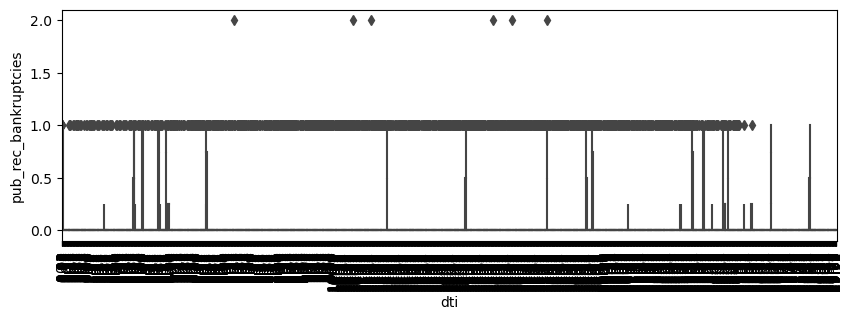

Box Plot of : dti Vs total_acc


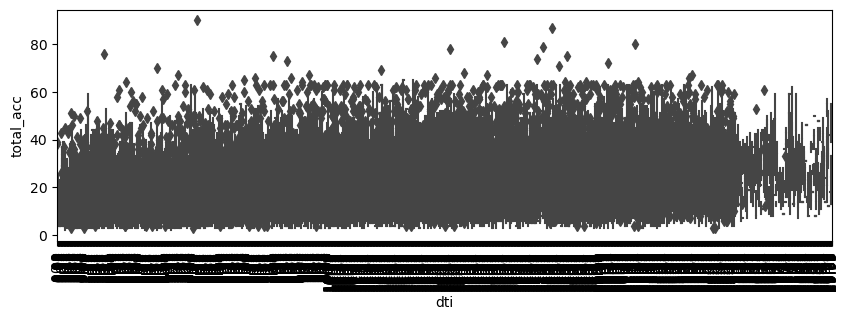

Box Plot of : dti Vs pub_rec


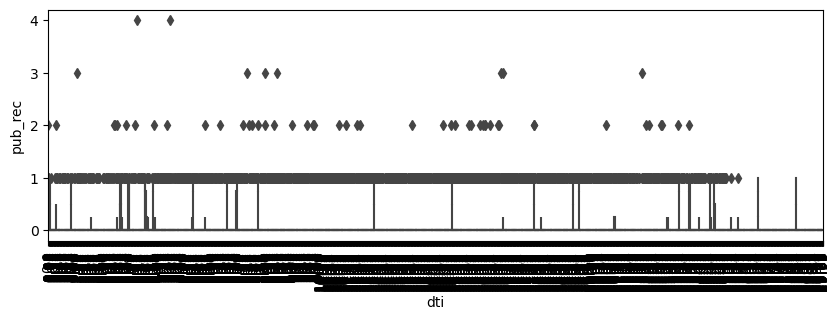

Box Plot of : dti Vs open_acc


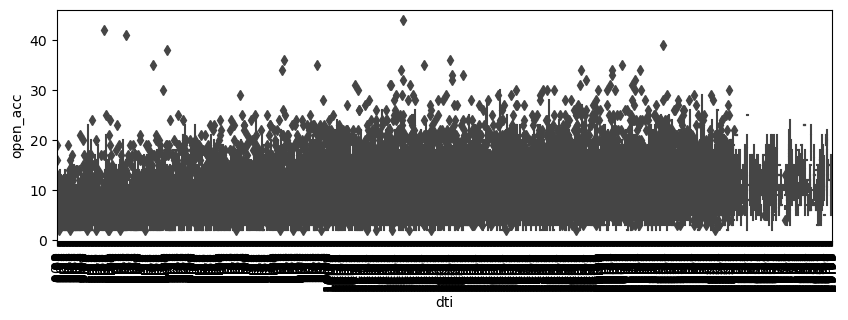

Box Plot of : dti Vs delinq_2yrs


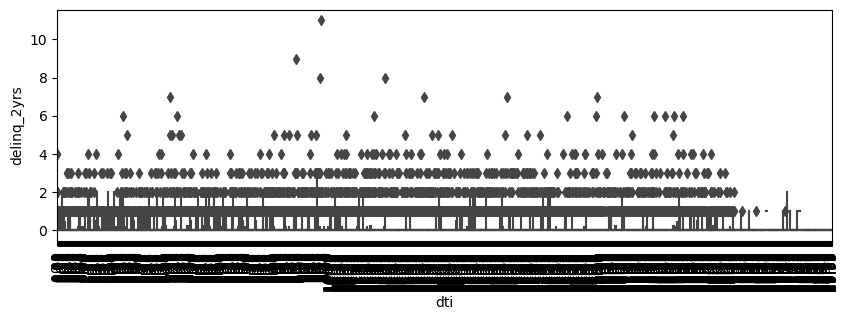

Box Plot of : dti Vs addr_state


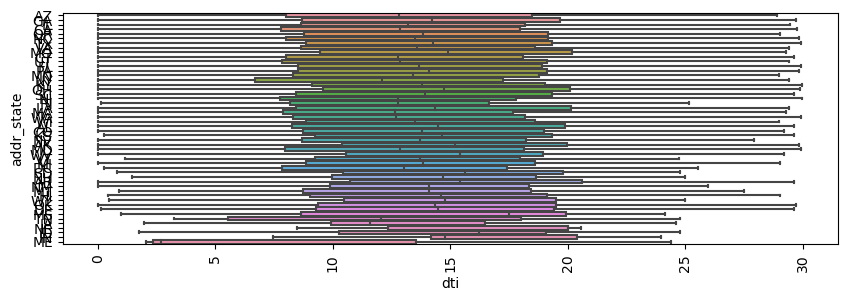

In [79]:
for col1 in updated_num_cols:
    for col2 in cat_cols_unordered:
        print("Box Plot of :", col1, "Vs", col2)
        fig=plt.figure(figsize=(10,3))
        sns.boxplot(x=df[col1], y=df[col2])
        plt.xticks(rotation=90)
        plt.show()

Hist Plot of : loan_amnt Vs verification_status


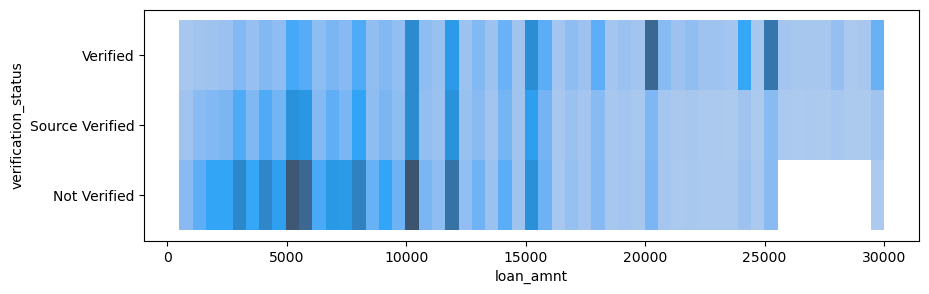

Hist Plot of : loan_amnt Vs issue_d_year


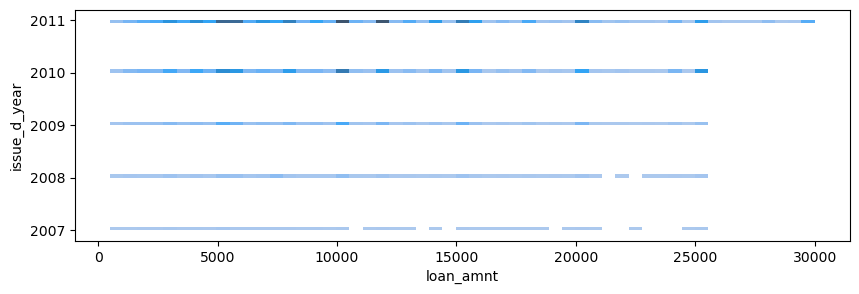

Hist Plot of : loan_amnt Vs issue_d_month


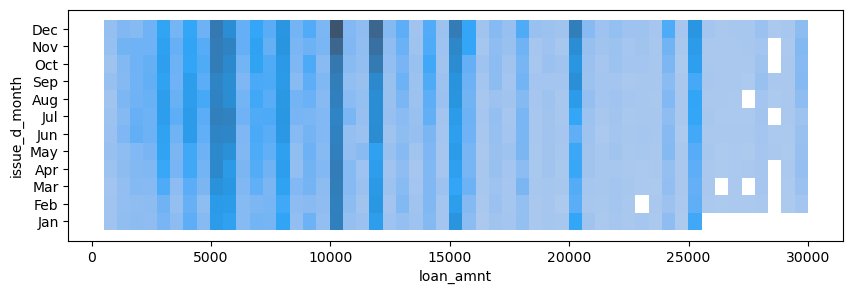

Hist Plot of : int_rate Vs verification_status


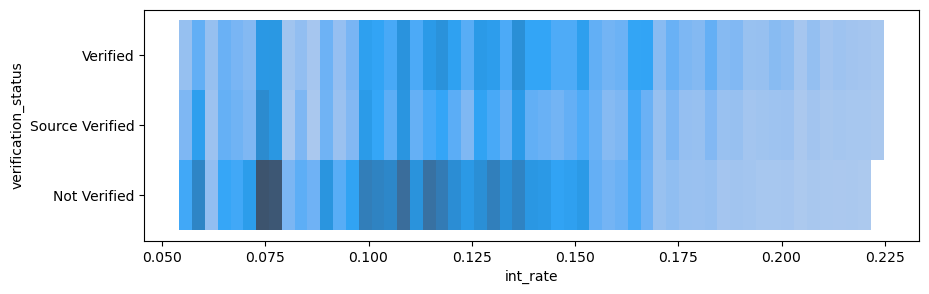

Hist Plot of : int_rate Vs issue_d_year


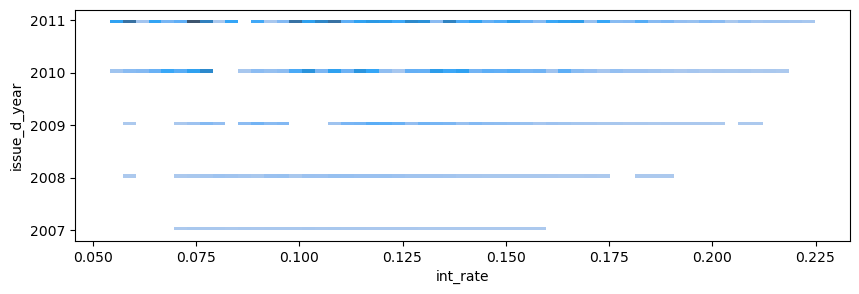

Hist Plot of : int_rate Vs issue_d_month


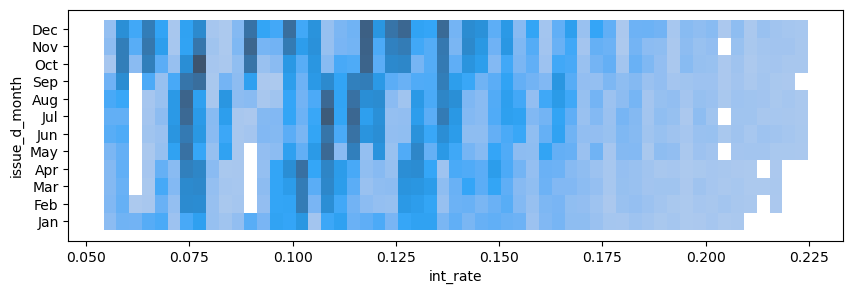

Hist Plot of : emp_length Vs verification_status


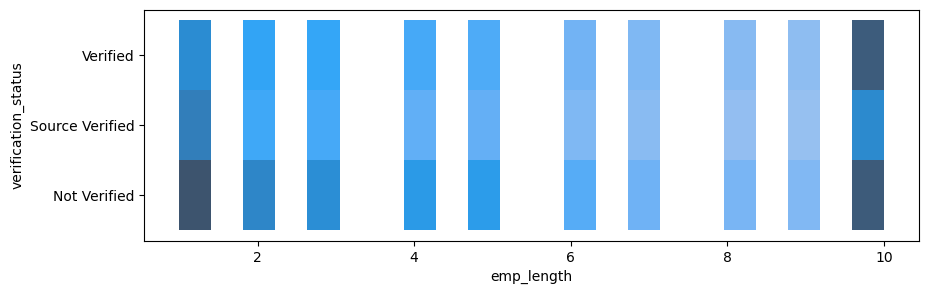

Hist Plot of : emp_length Vs issue_d_year


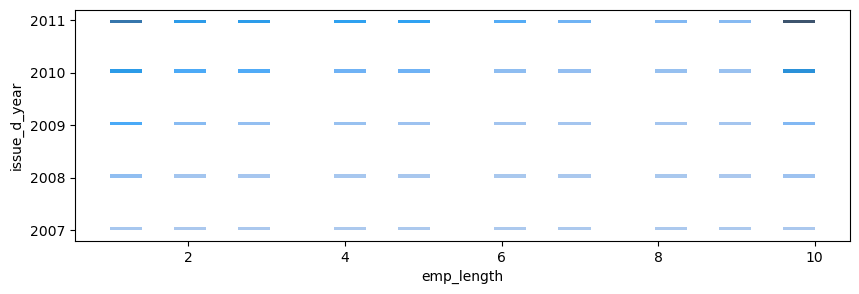

Hist Plot of : emp_length Vs issue_d_month


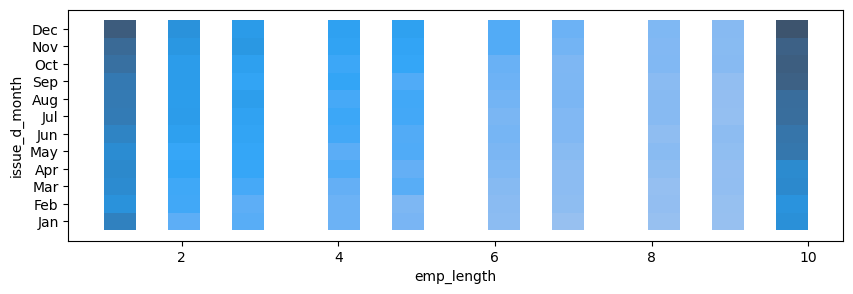

Hist Plot of : annual_inc Vs verification_status


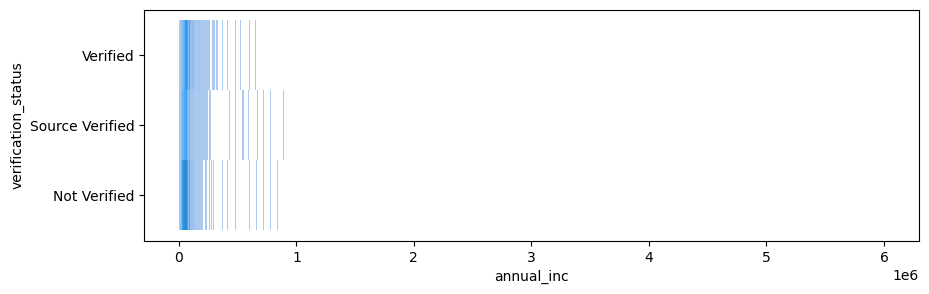

Hist Plot of : annual_inc Vs issue_d_year


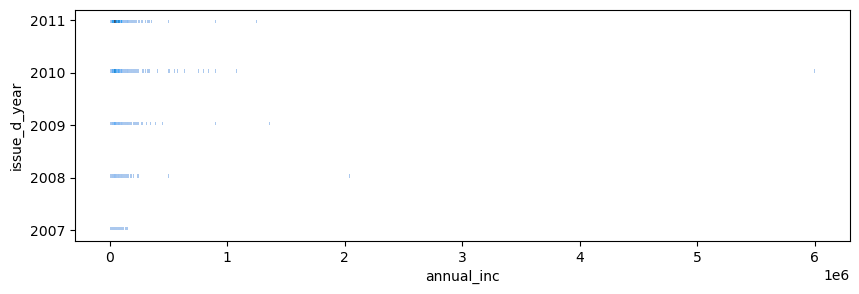

Hist Plot of : annual_inc Vs issue_d_month


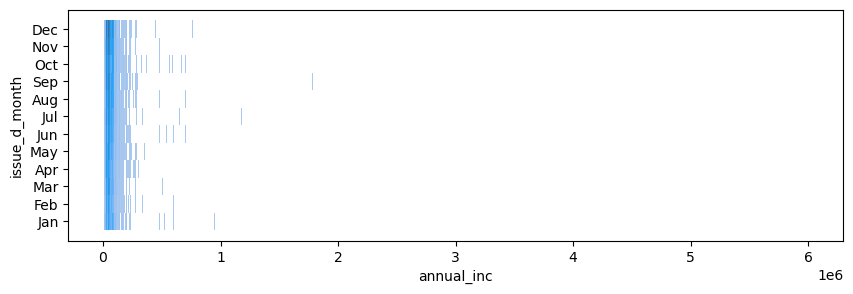

Hist Plot of : dti Vs verification_status


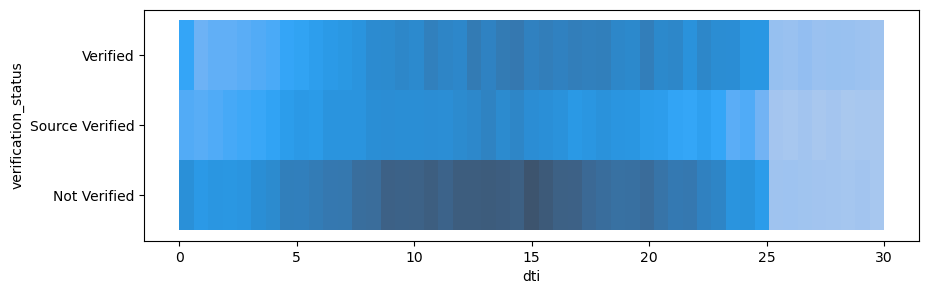

Hist Plot of : dti Vs issue_d_year


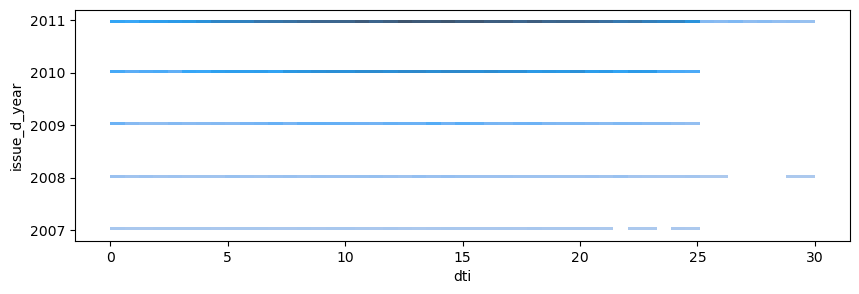

Hist Plot of : dti Vs issue_d_month


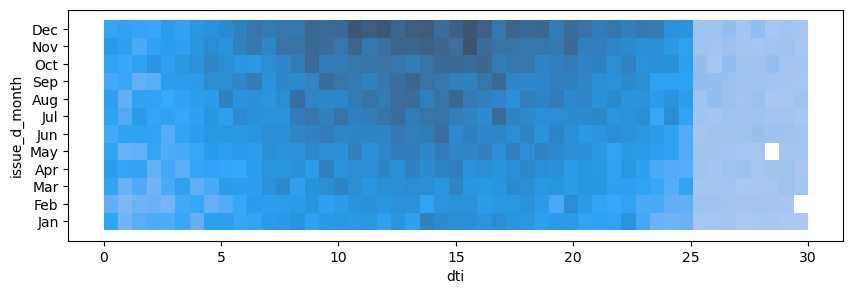

In [80]:
for col1 in updated_num_cols:
    for col2 in cat_cols_ordered:
        print("Hist Plot of :", col1, "Vs", col2)
        fig=plt.figure(figsize=(10,3))
        sns.histplot(x=df[col1], y=df[col2])
        plt.show()

Observations
1. The higher the loan amount the term is also increased to 60 months
2. The majority of the loan lies around 10000
3. For loan_status of Fully Paid and Charged Off the loan_amnt median is close to 10000 where as in Current the median is 15000
4. Majority of the loans taken are with the purpose debt_consolidation -which means this loan is taken to repay another loan and  small_business and second top reason is paying credit_card and house 
5. The higher the interest_rate there a quite a few outliers with term of 36 months
6. Employees with Grade B & A are highest loan seekers and there are more outliers in Grade A 
7. Employees with Grade F & G have higher int_rate
8. People with Subgrades A4, B3 ,B4,  B5 have taken loans 
9. Foe home_ownership of RENT, there outliers and the int_rate for all types is close to .125
10. For Source Not Verified the loan amount median is around 7000 and interest rate also seems to be less compared to other sources
11. More number of people from CA has taken followed by NY. This is a key parameter to analyze and who has not repaye
12. Employees with more experience have taken long term loans


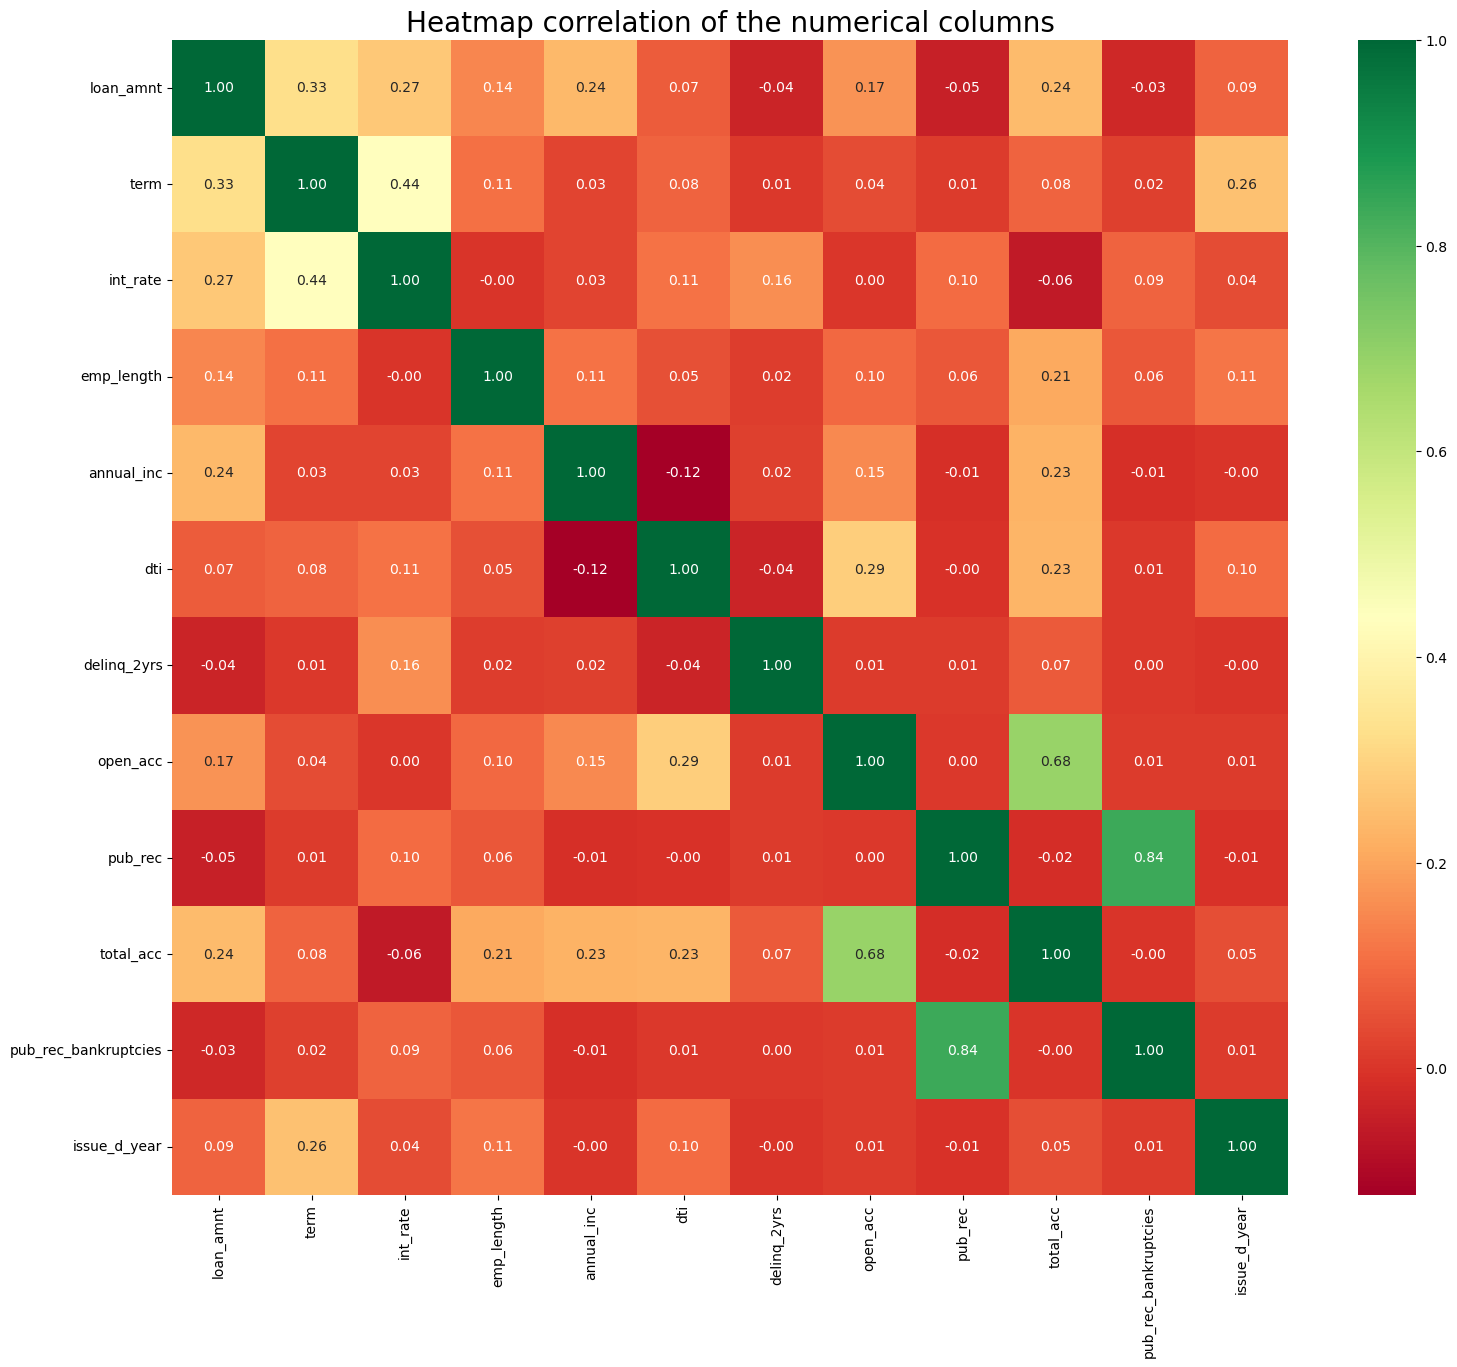

In [81]:
plt.figure(figsize=(18,15)) 
plt.title("Heatmap correlation of the numerical columns", fontsize=20)
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,fmt='.2f',cmap="RdYlGn")
plt.show()


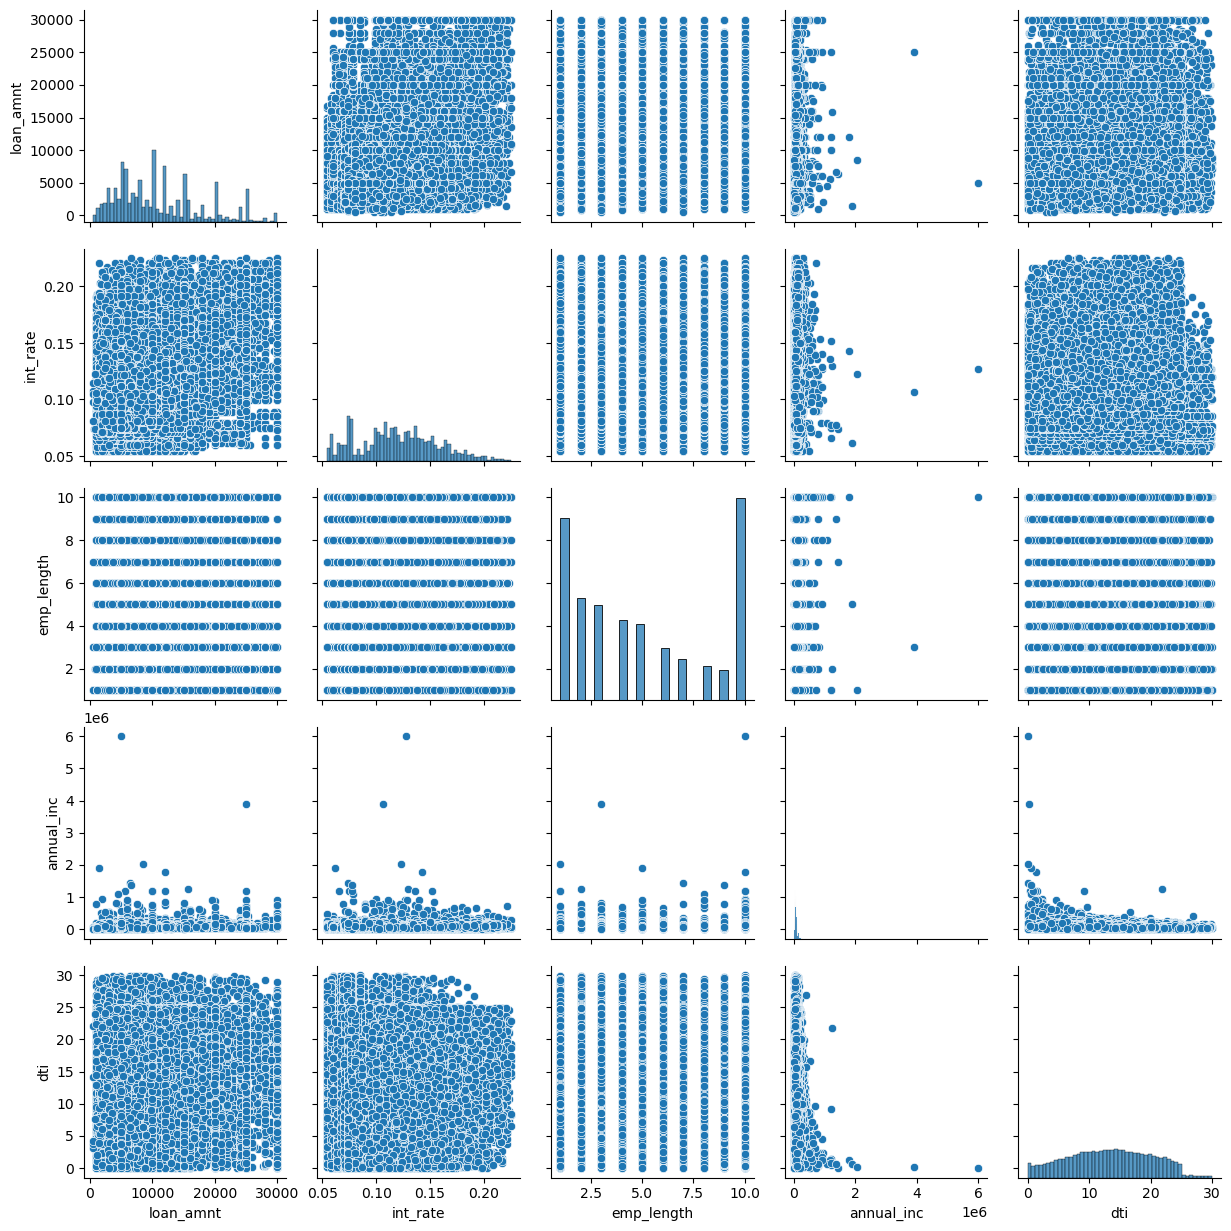

In [82]:
sns.pairplot(df[updated_num_cols]) #pairplot only for numerical columns of defaulted loans
plt.show()

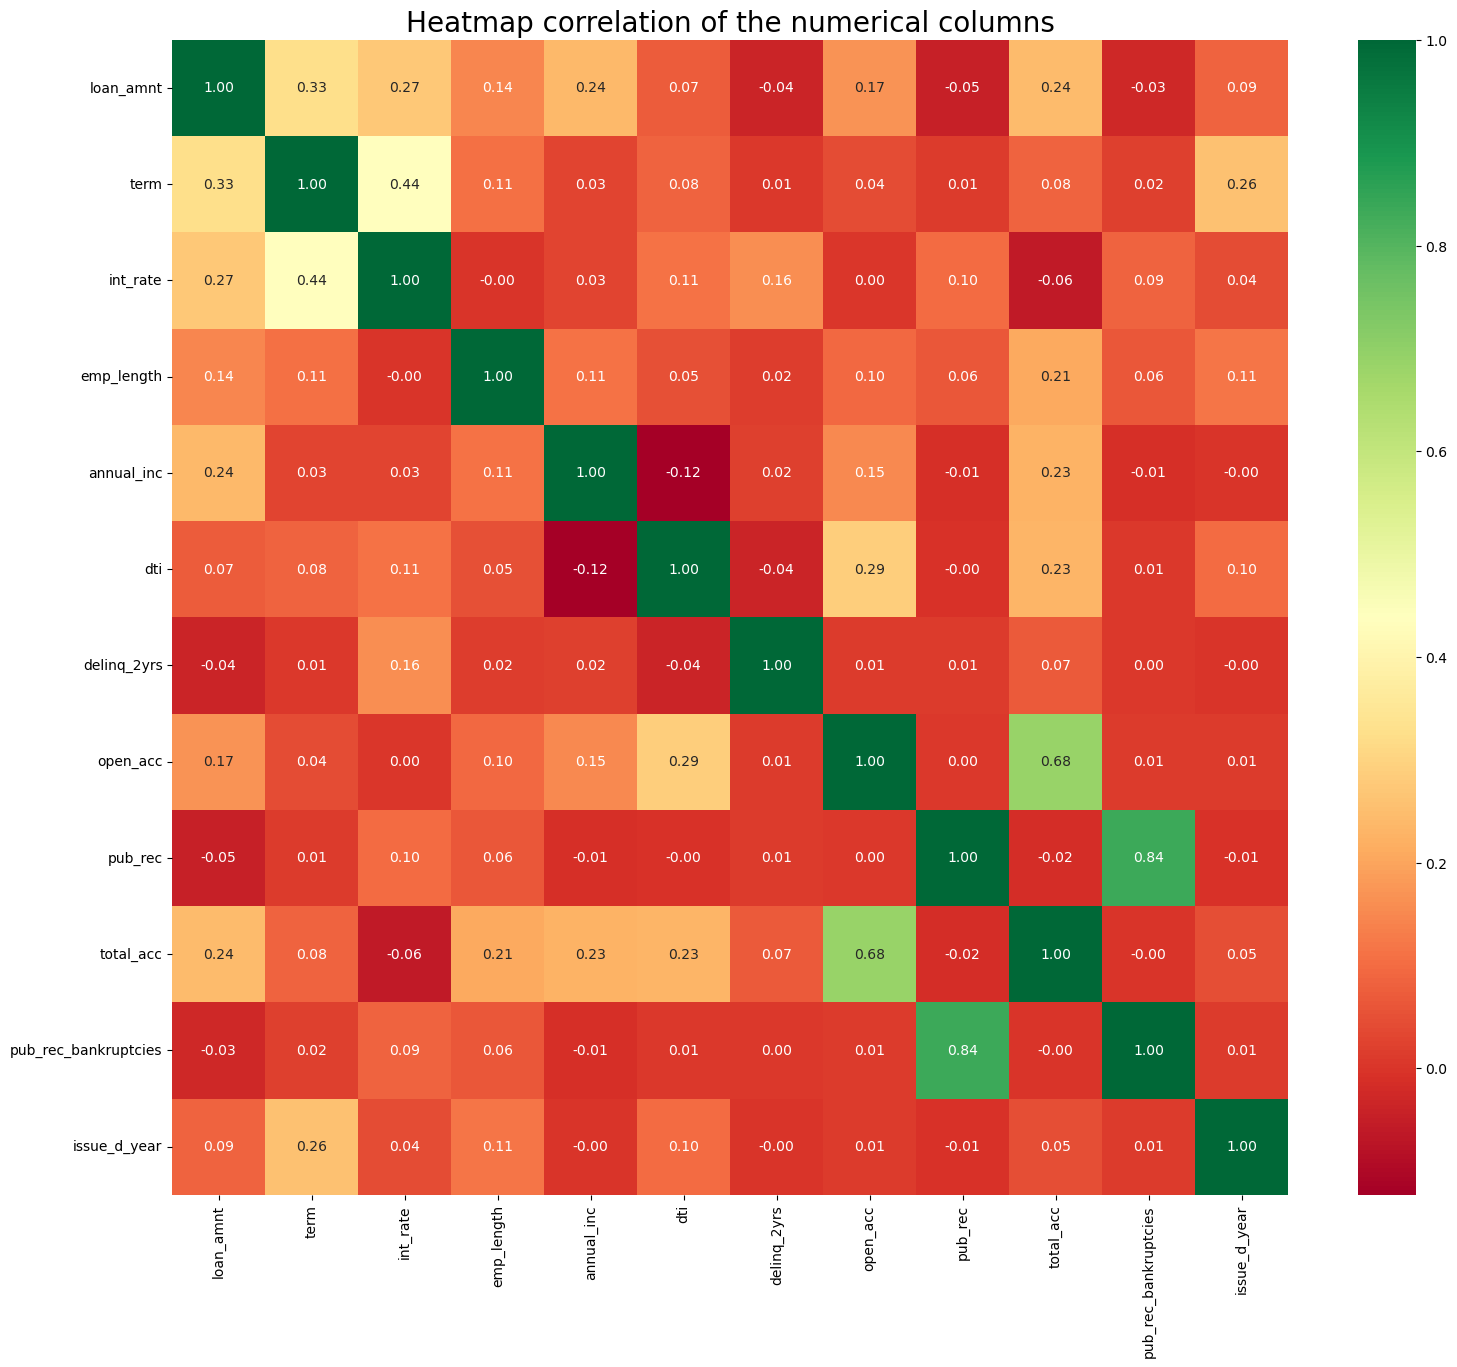

In [83]:
plt.figure(figsize=(18,15)) 
plt.title("Heatmap correlation of the numerical columns", fontsize=20)
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,fmt='.2f',cmap="RdYlGn")
plt.show()


Observations
1. Public record and public record bankrupcies are highly correlated
2. Annual income and debt to income ratio has negative correlation, meaning if one increases other decreases
3. Annual income have low correlation to the customers public record bankruptcies.
4. Based on the employment length, interest rates are not offered to the employees.
5. Customers with high interest rate have strong correlation with the loan term.